# 1.Introducción
## Propósito
El propósito de esta etapa es proporcionar una visión general del proyecto y los objetivos del análisis de datos, explicando el contexto del conjunto de datos y cómo se relaciona con el objetivo comercial de Elo. La exploración y comprensión de los datos de las transacciones y las características de los comercios se realizará para obtener una base sólida que permita un análisis más profundo y, finalmente, la construcción de modelos predictivos que mejoren la experiencia del usuario mediante recomendaciones personalizadas.

Este análisis tiene los siguientes objetivos específicos:

1. Comprender el contexto del negocio: Entender cómo Elo está trabajando con comerciantes y clientes, y cómo las promociones y descuentos pueden impactar la fidelización del cliente.

2. Revisar la calidad y la estructura de los datos: Asegurar que los datos sean adecuados para el modelado posterior y detectar posibles problemas como valores faltantes, errores o anomalías.

3. Explorar las relaciones clave entre variables: Identificar patrones y relaciones entre las variables para comprender qué características son más relevantes para la predicción del "Loyalty score".

4. Identificar oportunidades de mejora y refinamiento de los datos: Encontrar áreas en las que los datos puedan mejorarse o transformarse para obtener una mayor precisión en los modelos predictivos.

### Objetivo General:
Desarrollar un sistema de recomendación basado en machine learning que permita predecir el nivel de lealtad futura de los tarjetahabientes, con el fin de mejorar la personalización de promociones y maximizar el retorno para comercios aliados.

### Objetivos Específicos
1. Identificar patrones de comportamiento de compra que influyen en la lealtad de los clientes.
2. Anticipar el score de lealtad futura de los tarjetahabientes con base en sus transacciones anteriores.
3. Mejorar la eficiencia en la asignación de promociones comerciales personalizadas.
4. Incrementar la recurrencia de consumo en clientes con alta lealtad estimada.
5. Incorporar el score de lealtad como insumo recurrente en los procesos de toma de decisiones comerciales.

## Objetivos de minería
Desarrollar un sistema de recomendación que prediga el score de lealtad futura de los tarjetahabientes, a partir de sus datos de transacciones pasadas, para:

* Construir un modelo predictivo de score de lealtad.

* Segmentar a los clientes en grupos significativos basados en patrones de comportamiento.

* Evaluar la calidad del modelo con benchmarks internos.

* Garantizar la interpretabilidad del modelo para usuarios no técnicos.

* Asegurar la reproducibilidad del sistema de modelado.

### Hipotesis
* H1: Los clientes con mayor frecuencia de transacciones históricas tienen un score de lealtad más alto.
  Justificación: la frecuencia de uso puede ser indicativo de compromiso o satisfacción con la tarjeta.

* H2: El monto promedio de compra por transacción está positivamente relacionado con el score de lealtad.
  Justificación: clientes que gastan más por transacción pueden percibir más valor en el producto Elo.

* H3: Los clientes con alta diversidad de categorías de comercio muestran mayor lealtad.
  Justificación: mayor diversidad puede implicar integración más profunda del medio de pago en su vida cotidiana.

* H4: La antigüedad del cliente tiene relación positiva con la lealtad.
  Justificación: clientes antiguos tienden a tener mayor retención y hábitos consolidados.

* H5: Las transacciones más recientes tienen mayor impacto en el score de lealtad que las antiguas.
  Justificación: el score fue calculado a 2 meses posterior al periodo de evaluación, por lo que las compras recientes son más relevantes.

* H6: Clientes que realizaron transacciones en comercios con mayor volumen de promociones tendrán score más alto.
  Justificación: estar expuestos a promociones puede aumentar la percepción de valor y fidelidad.

* H7: Los clientes que usan cuotas tienden a ser más leales.
  Justificación: usar crédito podría implicar planificación y permanencia en el uso del producto.


## Archivos:
- train.csv: el conjunto de entrenamiento
- test.csv: el conjunto de prueba
- historical_transactions.csv: hasta 3 meses de transacciones históricas para cada card_id
- new_merchant_transactions.csv: dos meses de datos para cada card_id que contienen TODAS las compras realizadas por card_id en merchant_ids que no se vieron en los datos históricos.
- merchants.csv: información adicional sobre todos los comercios/commerce_ids del conjunto de datos.

# 2.Carga de los Datos

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test.csv to test.csv


In [ ]:
!ls

merchants.csv  new_merchant_transactions.csv  sample_data  train.csv


In [2]:
# Carga de datasets
vdf_train = pd.read_csv('src/train.csv')
vdf_test = pd.read_csv('src/test.csv')
vdf_hist_trans = pd.read_csv('src/historical_transactions.csv')
vdf_new_trans = pd.read_csv('src/new_merchant_transactions.csv')
vdf_merchants = pd.read_csv('src/merchants.csv')

In [3]:
# Visualización básica de las dimensiones, columnas, tipos de datos y primeras filas (head()).
vdf_train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [4]:
vdf_test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


In [5]:
vdf_hist_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [6]:
vdf_new_trans.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [7]:
vdf_merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


# 3.Descripción General de los Datos

## train.csv: descripción de variables, distribución del target (score de lealtad).
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|
|`target` |Puntuación numérica de fidelidad calculada 2 meses después del período histórico y de evaluación|

## test.csv: estructura y comparación con train.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta único|
|`first_active_month` |'AAAA-MM', mes de la primera compra|
|`feature_1` |Característica categórica de la tarjeta anonimizada|
|`feature_2` |Característica categórica de la tarjeta anonimizada|
|`feature_3` |Característica categórica de la tarjeta anonimizada|

## historical_transactions.csv: cantidad de registros por tarjeta, valores típicos.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta|
|`month_lag` |mes de retraso respecto a la fecha de referencia|
|`purchase_date` |Fecha de compra|
|`authorized_flag` |Y' si se aprueba, 'N' si se deniega|
|`category_3` |categoría anónima|
|`installments` |número de cuotas de compra|
|`category_1` |categoría anónima|
|`merchant_category_id` |Identificador de categoría de comerciante (anonimizado)|
|`subsector_id` |Identificador del grupo de categorías de comerciantes (anonimizado)|
|`merchant_id` |Identificador del comerciante (anonimizado)|
|`purchase_amount` |Monto de compra normalizado|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

## new_merchant_transactions.csv: análisis similar al histórico.
|Header |  Definition|
|---|---------|
|`card_id`|Identificador de tarjeta|
|`month_lag` |mes de retraso respecto a la fecha de referencia|
|`purchase_date` |Fecha de compra|
|`authorized_flag` |Y' si se aprueba, 'N' si se deniega|
|`category_3` |categoría anónima|
|`installments` |número de cuotas de compra|
|`category_1` |categoría anónima|
|`merchant_category_id` |Identificador de categoría de comerciante (anonimizado)|
|`subsector_id` |Identificador del grupo de categorías de comerciantes (anonimizado)|
|`merchant_id` |Identificador del comerciante (anonimizado)|
|`purchase_amount` |Monto de compra normalizado|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

##merchants.csv: cantidad de merchants, categorías, etc.
|Header |  Definition|
|---|---------|
|`merchant_id`|Identificador único de comerciante|
|`merchant_group_id` |Grupo de comerciantes (anónimo)|
|`merchant_category_id` |Identificador único para la categoría del comerciante (anonimizado)|
|`subsector_id` |Grupo de categorías de comerciantes (anonimizado)|
|`numerical_1` |medida anónima|
|`numerical_2` |medida anónima|
|`category_1` |categoría anónima|
|`most_recent_sales_range` |Rango de ingresos (unidades monetarias) en el último mes activo --> A > B > C > D > E|
|`most_recent_purchases_range` |Rango de cantidad de transacciones en el último mes activo --> A > B > C > D > E|
|`avg_sales_lag3` |Promedio mensual de ingresos en los últimos 3 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag3` |Promedio mensual de transacciones en los últimos 3 meses dividido por las transacciones en el último mes activo|
|`active_months_lag3` |Cantidad de meses activos en los últimos 3 meses|
|`avg_sales_lag6` |Promedio mensual de ingresos en los últimos 6 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag6` |Promedio mensual de transacciones en los últimos 6 meses dividido por las transacciones en el último mes activo|
|`active_months_lag6` |Cantidad de meses activos en los últimos 6 meses|
|`avg_sales_lag12` |Promedio mensual de ingresos en los últimos 12 meses dividido por los ingresos del último mes activo|
|`avg_purchases_lag12` |Promedio mensual de transacciones en los últimos 12 meses dividido por las transacciones en el último mes activo|
|`active_months_lag12` |Cantidad de meses activos en los últimos 12 meses|
|`category_4` |categoría anónima|
|`city_id` |Identificador de ciudad (anonimizado)|
|`state_id` |Identificador de estado (anonimizado)|
|`category_2` |categoría anónima|

# 4.Análisis Univariado

## 4.1.Merchant

In [8]:
# Descripción estadística (describe()) por variable.
vdf_merchants.describe()

c:\Users\Paul\Documents\Projects-vscode\data-mining\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Paul\Documents\Projects-vscode\data-mining\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Paul\Documents\Projects-vscode\data-mining\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


<Axes: xlabel='state_id'>

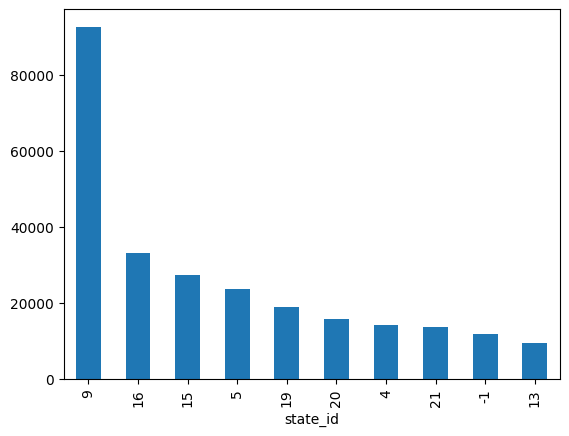

In [9]:
# Distribución del target (histograma, boxplot, etc).
vdf_merchants['city_id'].nunique()
vdf_merchants['state_id'].value_counts().head(10).plot(kind='bar')


4.1.1 Análisis de variables categóricas

Valores únicos en merchant_category_id: 324
merchant_category_id
705    30666
278    17992
307    17528
367    15387
68     14341
80     13520
222    11582
884    10398
683     9175
560     7988
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

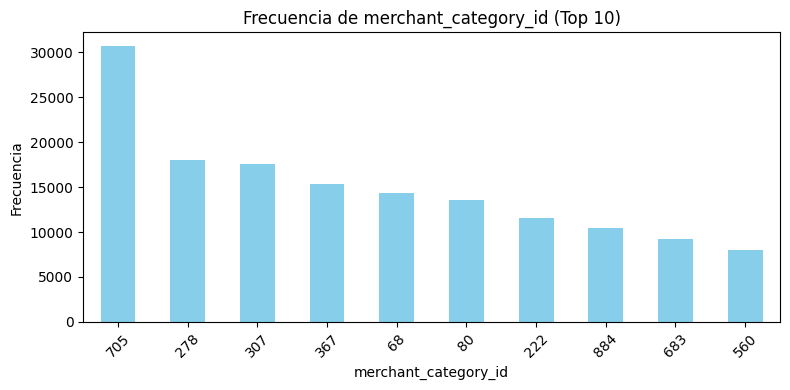

In [10]:
# Distribuciones por tipo de variable (categórica vs numérica).
#Análisis de merchant_category_id
# Número de categorías únicas
print("Valores únicos en merchant_category_id:", vdf_merchants['merchant_category_id'].nunique())

# Frecuencia de las 10 más comunes
print(vdf_merchants['merchant_category_id'].value_counts().head(10))

# Gráfico de barras
vdf_merchants['merchant_category_id'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title("Frecuencia de merchant_category_id (Top 10)")
plt.xlabel("merchant_category_id")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show



Valores únicos en subsector_id: 41
subsector_id
27    51678
37    35575
33    30887
34    26533
21    24207
29    21588
19    20361
16    16435
18    14279
20     9528
Name: count, dtype: int64


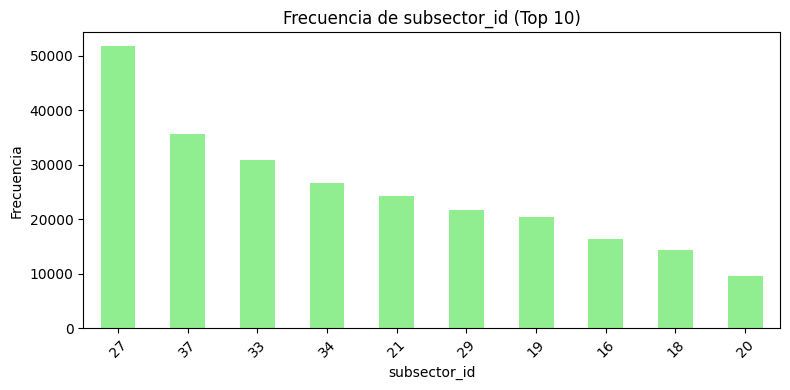

In [13]:
#Análisis de subsector_id
print("Valores únicos en subsector_id:", vdf_merchants['subsector_id'].nunique())
print(vdf_merchants['subsector_id'].value_counts().head(10))

vdf_merchants['subsector_id'].value_counts().head(10).plot(kind='bar', figsize=(8, 4), color='lightgreen')
plt.title("Frecuencia de subsector_id (Top 10)")
plt.xlabel("subsector_id")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Distribución de most_recent_sales_range:
most_recent_sales_range
E    177104
D    117475
C     34075
B      5037
A      1005
Name: count, dtype: int64


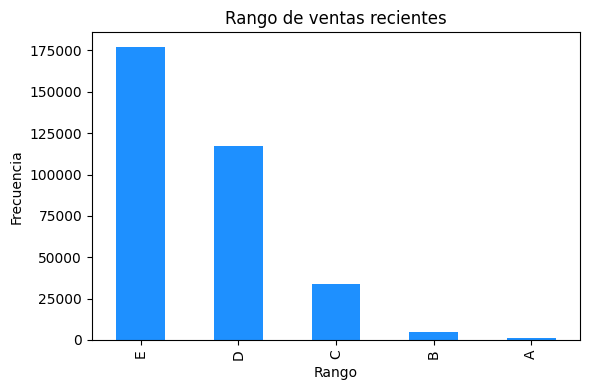

In [14]:
#Análisis de most_recent_sales_range
orden = ['E', 'D', 'C', 'B', 'A']
ventas = vdf_merchants['most_recent_sales_range'].value_counts().reindex(orden)

print("Distribución de most_recent_sales_range:")
print(ventas)

ventas.plot(kind='bar', figsize=(6, 4), color='dodgerblue')
plt.title("Rango de ventas recientes")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


En el gráfico de barras se puede observar la distribución del rango de ingresos recientes de los comercios donde A es el rango más alto y E el más bajo. Mientras que el rango A que representa los mayores ingresos activos tiene una frecuencia mucho menor lo que indica que la mayoría de los comercios tienen ingresos recientes en los rangos más bajos especialmente en el rango E con una alta concentración Esto sugiere que la distribución de ingresos entre los comercios es muy asimétrica con un gran número de comercios generando menos ingresos recientes

Distribución de most_recent_purchases_range:
most_recent_purchases_range
E    175309
D    119187
C     34144
B      5046
A      1010
Name: count, dtype: int64


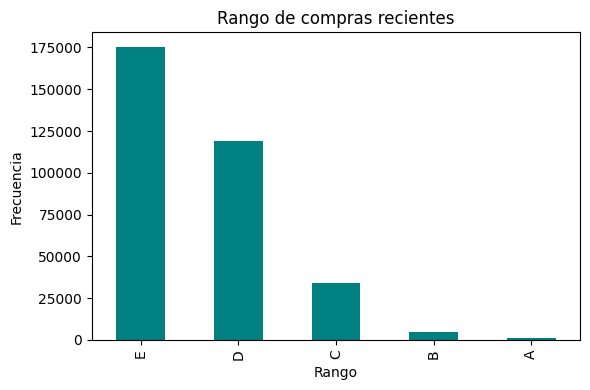

In [15]:
#Análisis de most_recent_purchases_range
compras = vdf_merchants['most_recent_purchases_range'].value_counts().reindex(orden)

print("Distribución de most_recent_purchases_range:")
print(compras)

compras.plot(kind='bar', figsize=(6, 4), color='teal')
plt.title("Rango de compras recientes")
plt.xlabel("Rango")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


**4.1.2 Análisis de variables numéricas**

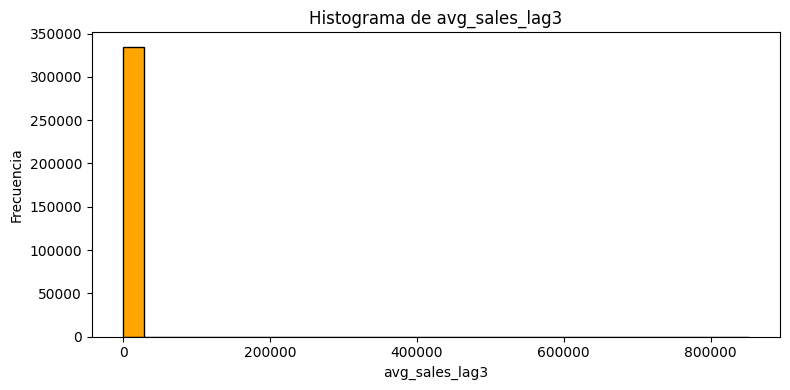

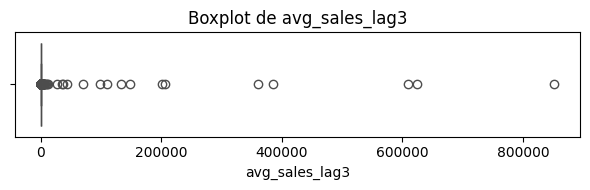

In [16]:
plt.figure(figsize=(8, 4))
plt.hist(vdf_merchants['avg_sales_lag3'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title("Histograma de avg_sales_lag3")
plt.xlabel("avg_sales_lag3")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=vdf_merchants['avg_sales_lag3'], color='orange')
plt.title("Boxplot de avg_sales_lag3")
plt.tight_layout()
plt.show()


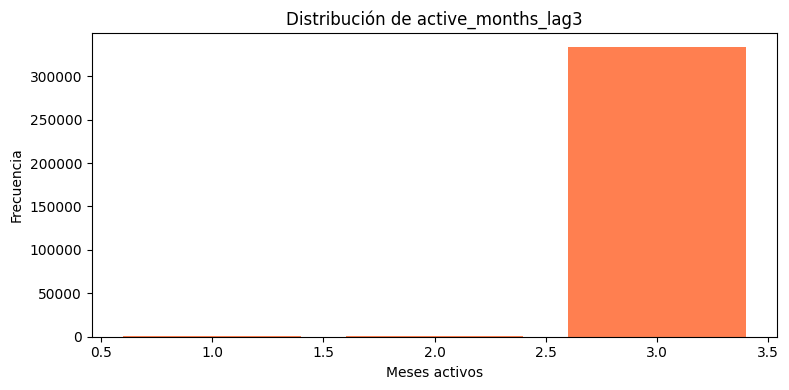

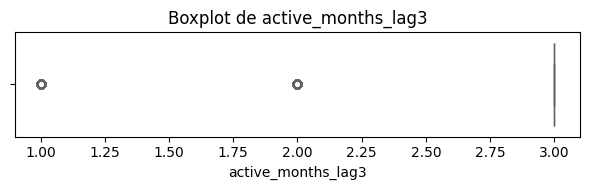

In [17]:
plt.figure(figsize=(8, 4))
plt.bar(vdf_merchants['active_months_lag3'].value_counts().sort_index().index,
        vdf_merchants['active_months_lag3'].value_counts().sort_index().values,
        color='coral')
plt.title("Distribución de active_months_lag3")
plt.xlabel("Meses activos")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 2))
sns.boxplot(x=vdf_merchants['active_months_lag3'], color='coral')
plt.title("Boxplot de active_months_lag3")
plt.tight_layout()
plt.show()


In [18]:
# Conteo de valores nulos
vdf_merchants.isnull().sum()


merchant_id                        0
merchant_group_id                  0
merchant_category_id               0
subsector_id                       0
numerical_1                        0
numerical_2                        0
category_1                         0
most_recent_sales_range            0
most_recent_purchases_range        0
avg_sales_lag3                    13
avg_purchases_lag3                 0
active_months_lag3                 0
avg_sales_lag6                    13
avg_purchases_lag6                 0
active_months_lag6                 0
avg_sales_lag12                   13
avg_purchases_lag12                0
active_months_lag12                0
category_4                         0
city_id                            0
state_id                           0
category_2                     11887
dtype: int64

In [19]:
# Conteo total de filas duplicadas
vdf_merchants.duplicated().sum()


np.int64(0)

## 4.2.Train

In [20]:
#Estadísticas básicas
vdf_train.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


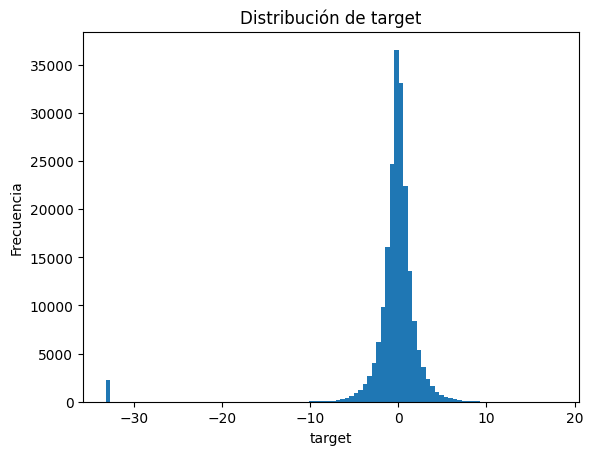

In [21]:
# Distribución del target (histograma, boxplot, etc).
plt.hist(vdf_train['target'], bins=100)
plt.title('Distribución de target')
plt.xlabel('target')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de los tarjetahabientes tienen un score de lealtad (target) cercano a cero Esto sugiere que una gran parte de la base de clientes tiene una lealtad neutral o promedio Los scores se distribuyen alrededor de cero. Los valores extremos son menos comunes aunque existen tarjetahabientes con scores negativos (menor lealtad) y scores positivos (mayor lealtad) La presencia de valores muy bajos en el target podría indicar tarjetahabientes con baja lealtad o incluso abandono

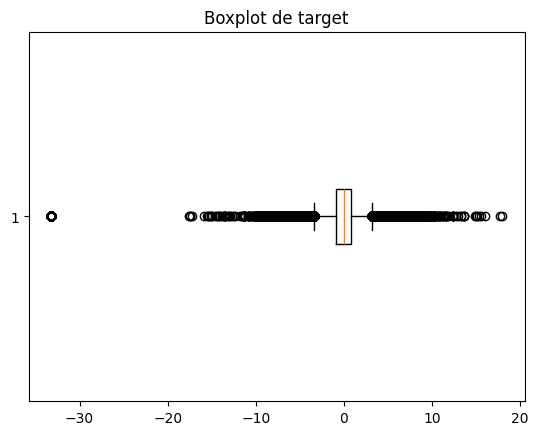

In [22]:
plt.boxplot(vdf_train['target'], vert=False)
plt.title('Boxplot de target')
plt.show()


Distribución de feature_1:
feature_1
3    73573
2    55797
5    40625
4    19885
1    12037
Name: count, dtype: int64




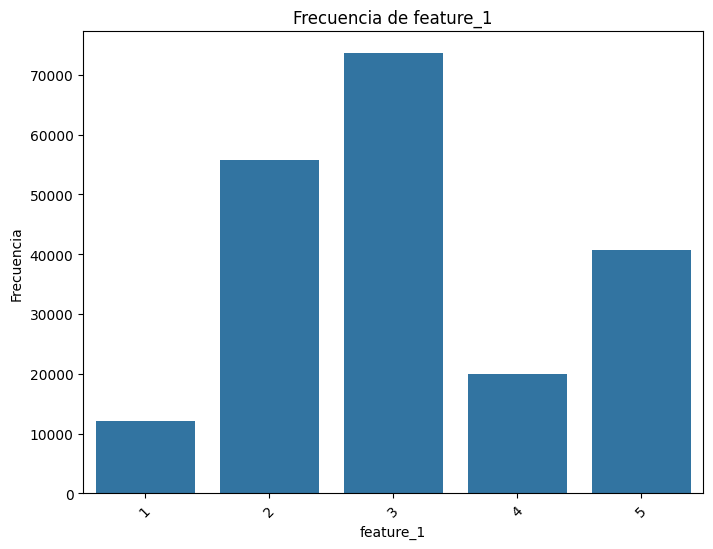

Distribución de feature_2:
feature_2
1    89242
2    74839
3    37836
Name: count, dtype: int64




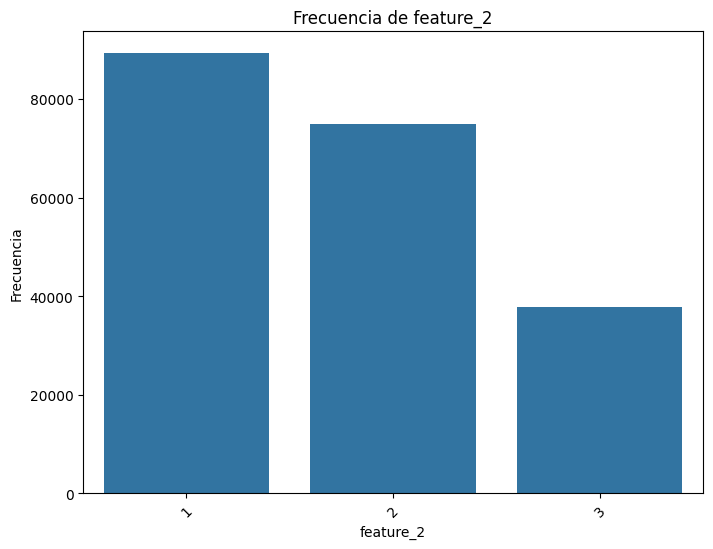

Distribución de feature_3:
feature_3
1    114198
0     87719
Name: count, dtype: int64




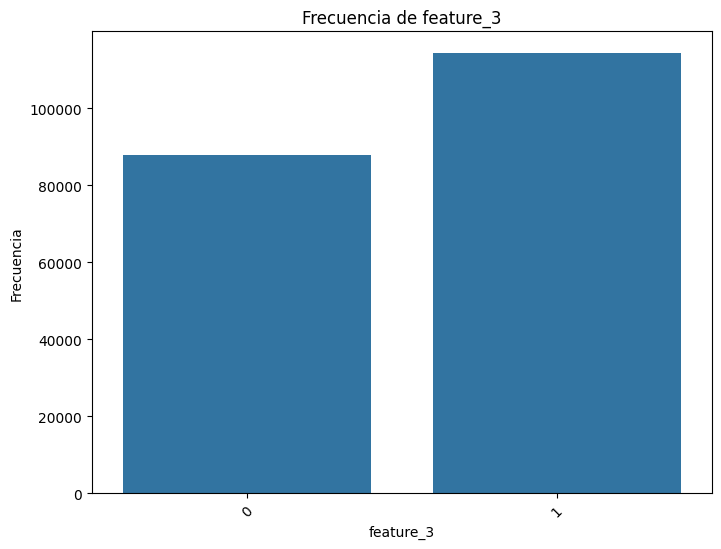

In [23]:
# Distribuciones de las variables
for feature in ['feature_1', 'feature_2', 'feature_3']:
    print(f"Distribución de {feature}:")
    print(vdf_train[feature].value_counts())
    print("\n")

    plt.figure(figsize=(8, 6))
    sns.countplot(data=vdf_train, x=feature)
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

In [24]:
# Conteo de valores nulos, duplicados, outliers simples.
print("Número de valores únicos en 'card_id':", vdf_train['card_id'].nunique())
print("¿Existen duplicados en 'card_id'?", vdf_train['card_id'].duplicated().any())

Número de valores únicos en 'card_id': 201917
¿Existen duplicados en 'card_id'? False


## 4.3 new_merchant_transactions

In [25]:
vdf_new_trans.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.851286e+06,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,-5.509690e-01,2.197841e+00,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,6.940043e-01,1.528125e+00,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.468928e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.166294e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748406e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.816162e-01,3.000000e+00,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.631575e+02,5.000000e+00,2.400000e+01,4.100000e+01



Distribución de category_1:
category_1
N    1899935
Y      63096
Name: count, dtype: int64


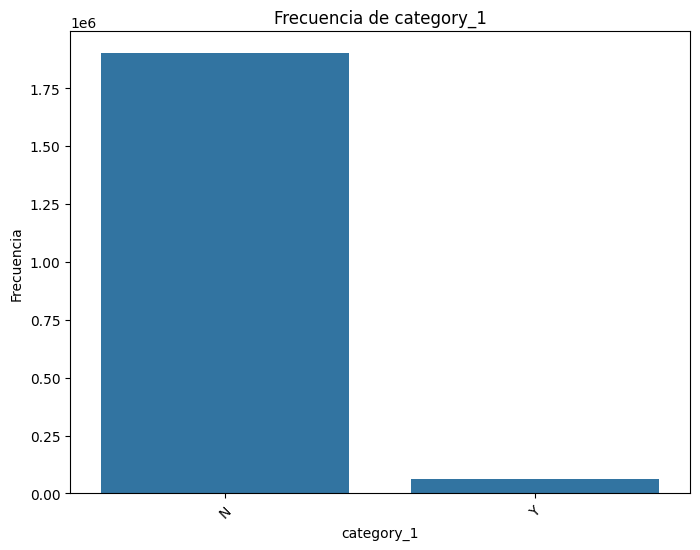


Distribución de category_2:
category_2
1.0    1058242
3.0     289525
5.0     259266
4.0     178590
2.0      65663
Name: count, dtype: int64


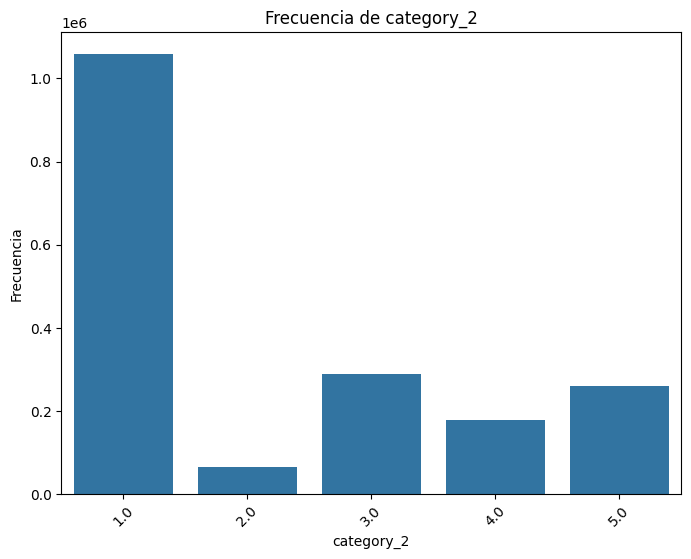


Distribución de category_3:
category_3
A    922244
B    836178
C    148687
Name: count, dtype: int64


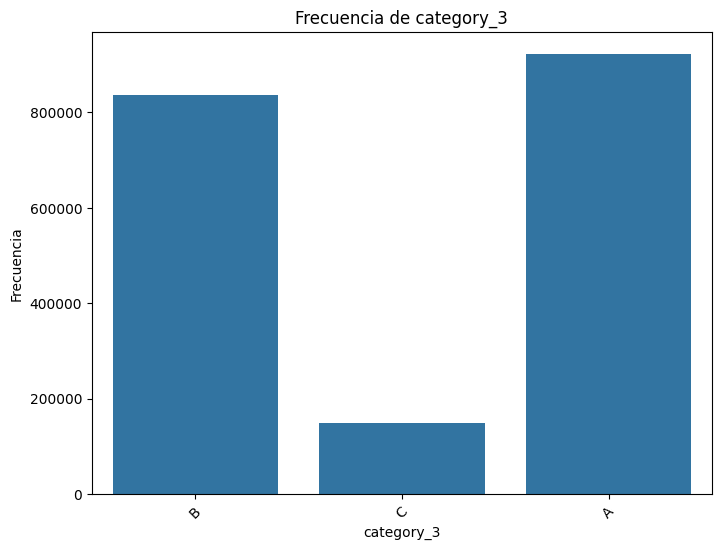

In [26]:
# Análisis de variables categóricas
categorical_features = ['category_1', 'category_2', 'category_3']

for feature in categorical_features:
    print(f"\nDistribución de {feature}:")
    print(vdf_new_trans[feature].value_counts())

    # Graficar la frecuencia de las categorías
    plt.figure(figsize=(8, 6))
    sns.countplot(data=vdf_new_trans, x=feature)
    plt.title(f'Frecuencia de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()


Estadísticas descriptivas de variables numéricas:
       purchase_amount  installments
count     1.963031e+06  1.963031e+06
mean     -5.509690e-01  6.829643e-01
std       6.940043e-01  1.584069e+00
min      -7.468928e-01 -1.000000e+00
25%      -7.166294e-01  0.000000e+00
50%      -6.748406e-01  1.000000e+00
75%      -5.816162e-01  1.000000e+00
max       2.631575e+02  9.990000e+02


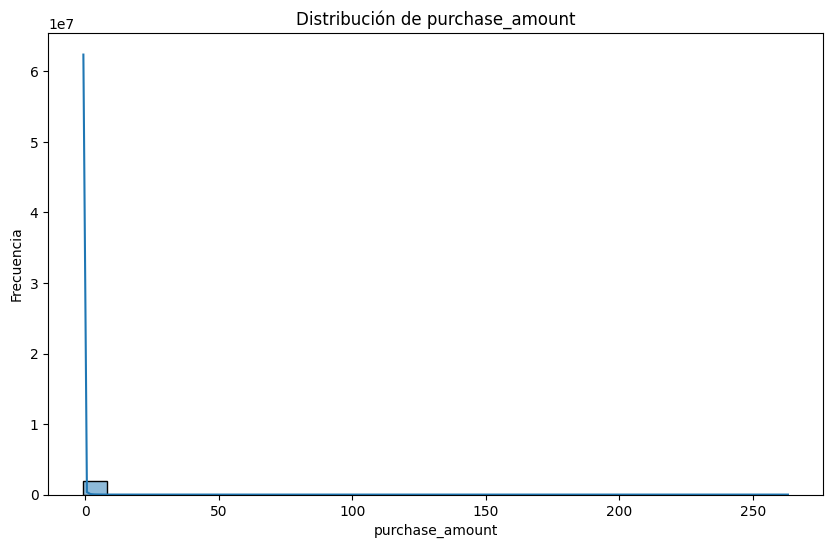

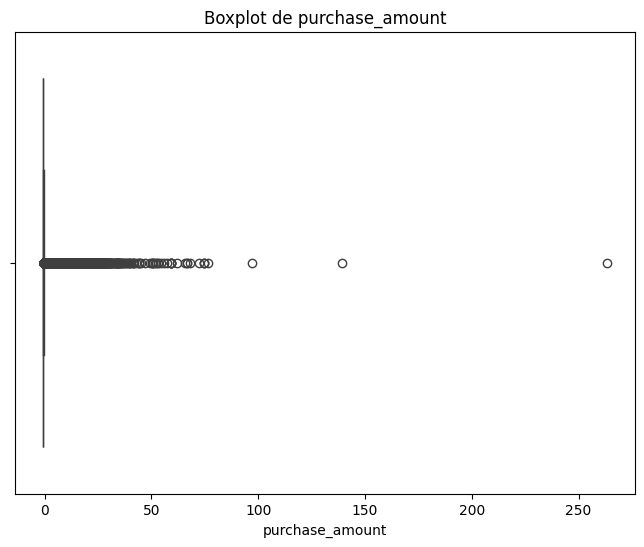

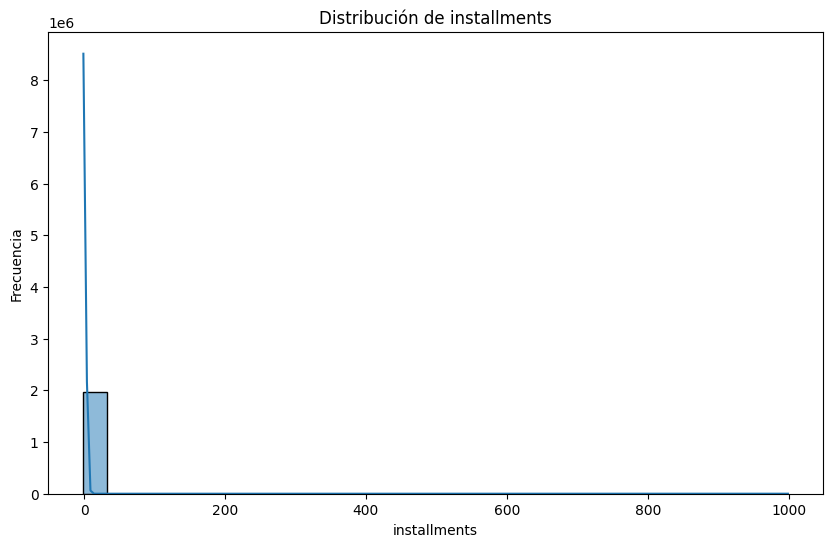

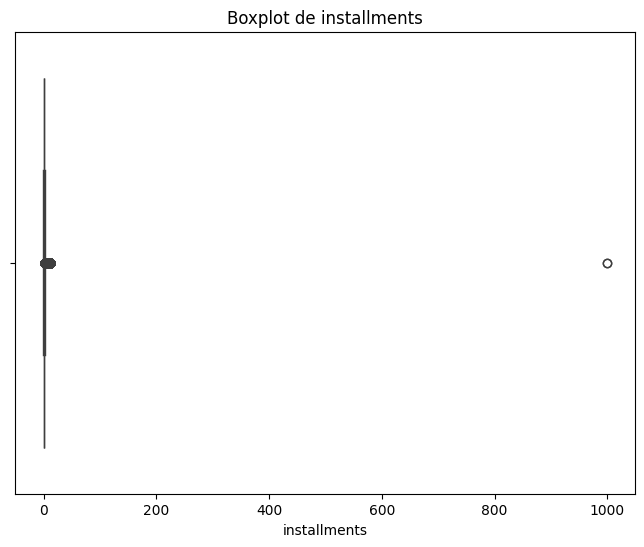

In [27]:
# Análisis de variables numéricas
numerical_features = ['purchase_amount', 'installments']

# Estadísticas descriptivas para las variables numéricas
print("\nEstadísticas descriptivas de variables numéricas:")
print(vdf_new_trans[numerical_features].describe())

# Histogramas y KDE de las variables numéricas
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(vdf_new_trans[feature], kde=True, bins=30)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Frecuencia')
    plt.show()

    # Boxplot para detectar outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=vdf_new_trans[feature])
    plt.title(f'Boxplot de {feature}')
    plt.show()

In [28]:
# Verificación de valores nulos
print("\nValores nulos en el conjunto de datos:")
print(vdf_new_trans.isnull().sum())


Valores nulos en el conjunto de datos:
authorized_flag              0
card_id                      0
city_id                      0
category_1                   0
installments                 0
category_3               55922
merchant_category_id         0
merchant_id              26216
month_lag                    0
purchase_amount              0
purchase_date                0
category_2              111745
state_id                     0
subsector_id                 0
dtype: int64


## 4.4 Historical_transactions

Análisis variables categóricas:

Variable: authorized_flag
- Número de categorías únicas: 2
- Frecuencia de valores:
authorized_flag
Y    26595452
N     2516909
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


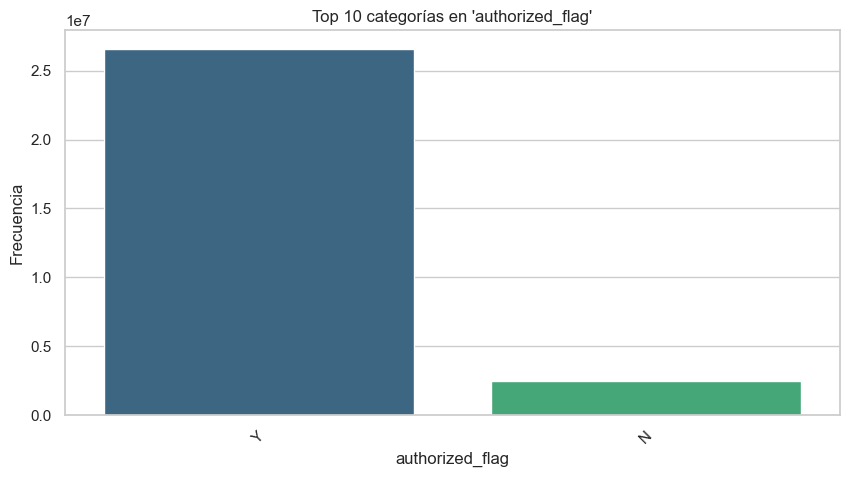

Variable: card_id
- Número de categorías únicas: 325540
- Frecuencia de valores:
card_id
C_ID_3d3dfdc692    5582
C_ID_0cd2ce025c    2912
C_ID_cc3d4cd4e3    2143
C_ID_5ccc07beb9    2066
C_ID_5ea401d358    1786
C_ID_9f81506906    1665
C_ID_6ae9f40da5    1665
C_ID_272aa0597a    1647
C_ID_9f63809b99    1634
C_ID_80c1c711c9    1593
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


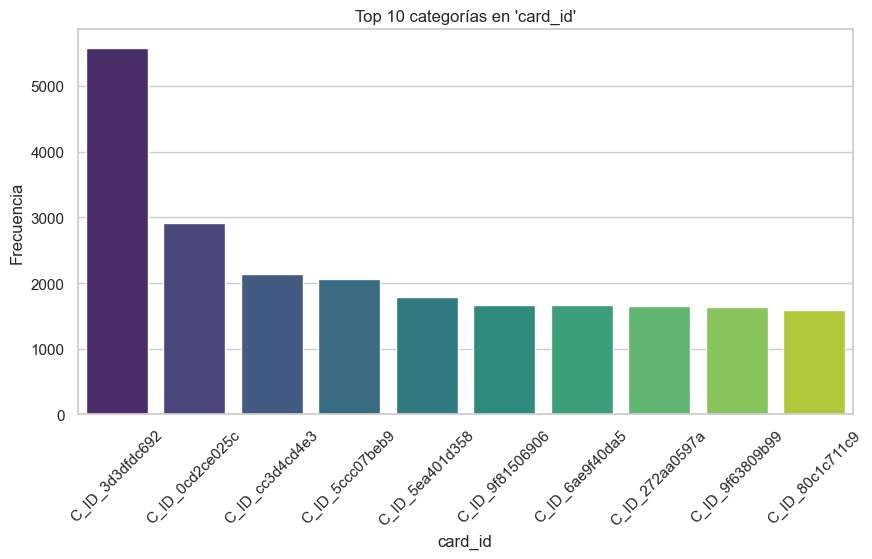

Variable: city_id
- Número de categorías únicas: 308
- Frecuencia de valores:
city_id
 69     4835441
-1      2478624
 19     1151077
 158    1113013
 17      971714
 331     714414
 143     668769
 88      659328
 137     603023
 333     561144
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


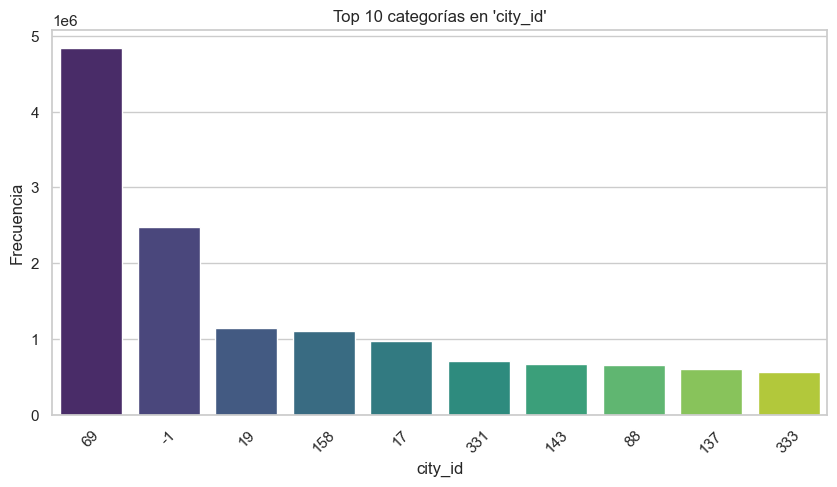

Variable: category_1
- Número de categorías únicas: 2
- Frecuencia de valores:
category_1
N    27028332
Y     2084029
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


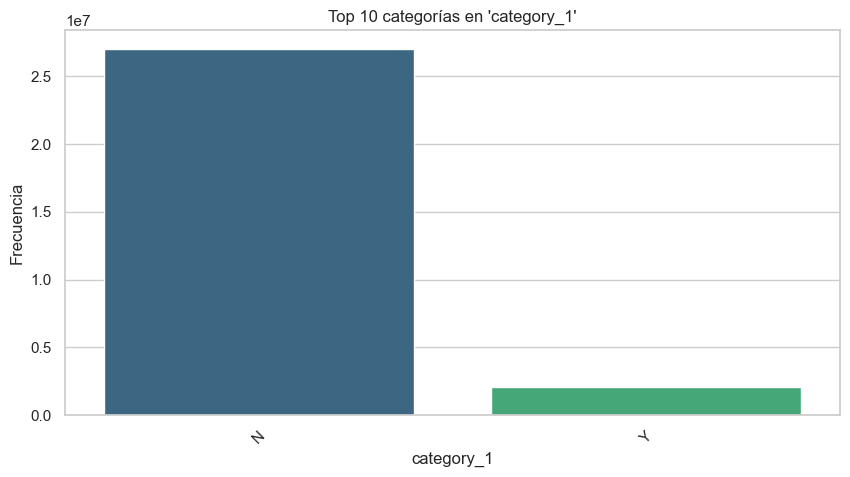

Variable: category_3
- Número de categorías únicas: 3
- Frecuencia de valores:
category_3
A      15411747
B      11677522
C       1844933
NaN      178159
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


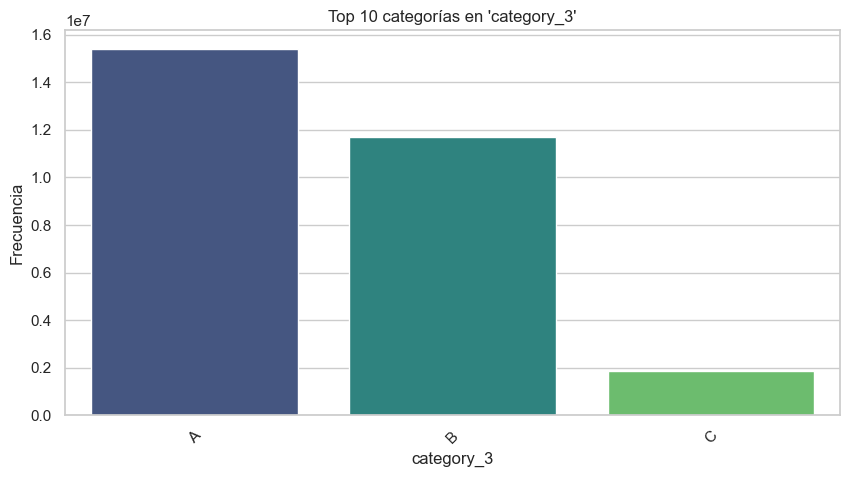

Variable: merchant_category_id
- Número de categorías únicas: 327
- Frecuencia de valores:
merchant_category_id
705    5554009
307    3057930
278    2254227
80     1929413
367    1608239
879    1430607
560    1110681
683     822021
437     665634
690     459101
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


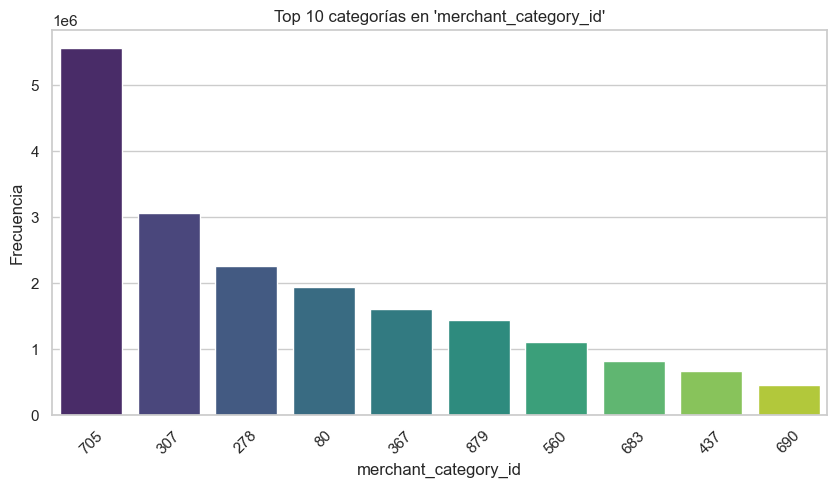

Variable: merchant_id
- Número de categorías únicas: 326311
- Frecuencia de valores:
merchant_id
M_ID_00a6ca8a8a    1115097
M_ID_e5374dabc0     428619
M_ID_9139332ccc     361385
M_ID_50f575c681     183894
M_ID_fc7d7969c3     177040
M_ID_5ba019a379     170935
NaN                 138481
M_ID_f86439cec0     110341
M_ID_1f4773aa76     106476
M_ID_86be58d7e0      97259
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


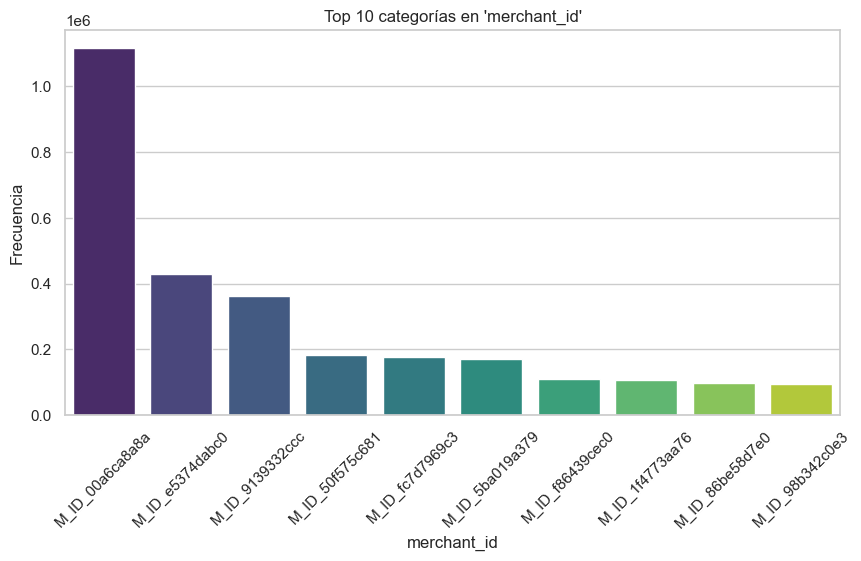

Variable: category_2
- Número de categorías únicas: 5
- Frecuencia de valores:
category_2
1.0    15177199
3.0     3911795
5.0     3725915
NaN     2652864
4.0     2618053
2.0     1026535
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


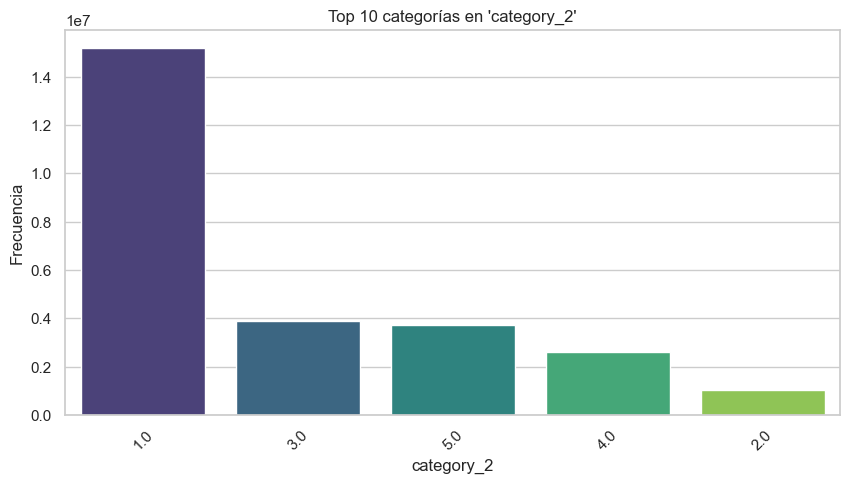

Variable: state_id
- Número de categorías únicas: 25
- Frecuencia de valores:
state_id
 9     10568881
-1      2652864
 16     2143420
 15     2079255
 5      1655124
 19     1204287
 20     1141197
 22      971714
 21      929594
 4       840820
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


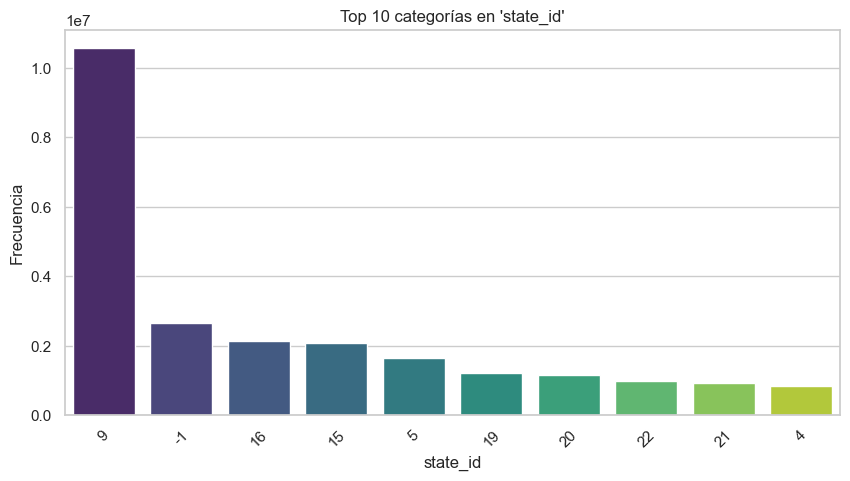

Variable: subsector_id
- Número de categorías únicas: 41
- Frecuencia de valores:
subsector_id
33    5594146
37    4531755
19    3147440
29    2813095
34    2759431
27    1658301
16    1651384
21     837612
7      711977
1      695263
Name: count, dtype: int64



C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\3093213145.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")


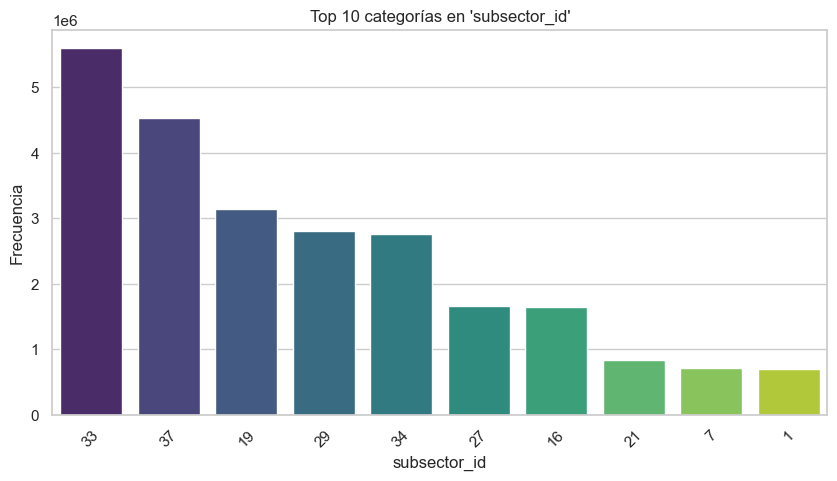

In [29]:
#Variables categóricas y numéricas
categorical_vars = [
    'authorized_flag', 'card_id', 'city_id', 'category_1', 'category_3',
    'merchant_category_id', 'merchant_id', 'category_2', 'state_id', 'subsector_id'
]

numerical_vars = [
    'installments', 'month_lag', 'purchase_amount'
]

sns.set(style="whitegrid")

#Análisis variables categóricas
print("Análisis variables categóricas:\n")
for col in categorical_vars:
    print(f"Variable: {col}")
    print(f"- Número de categorías únicas: {vdf_hist_trans[col].nunique()}")
    print(f"- Frecuencia de valores:\n{vdf_hist_trans[col].value_counts(dropna=False).head(10)}\n")

    # Graficar top 10 categorías
    top_categories = vdf_hist_trans[col].value_counts().nlargest(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_categories.index.astype(str), y=top_categories.values, palette="viridis")
    plt.title(f"Top 10 categorías en '{col}'")
    plt.ylabel('Frecuencia')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()




Variable: installments
- Valores nulos: 0


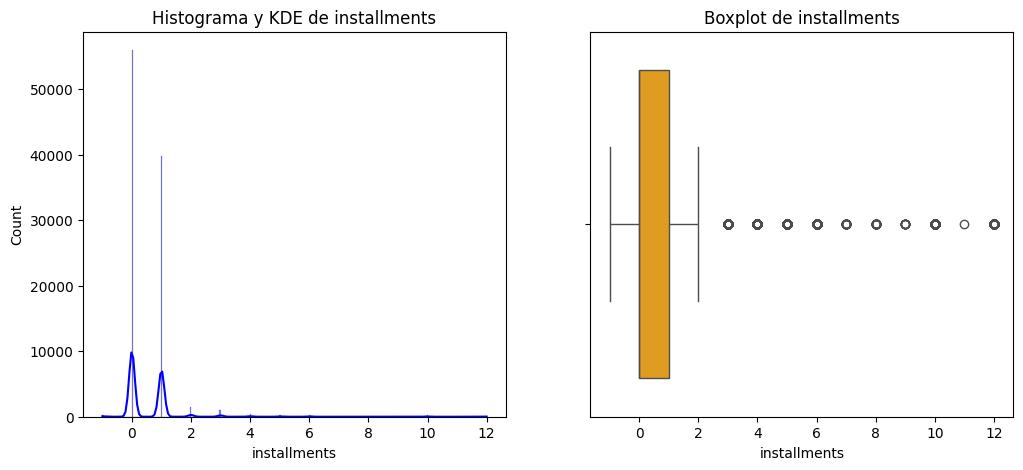


Variable: month_lag
- Valores nulos: 0


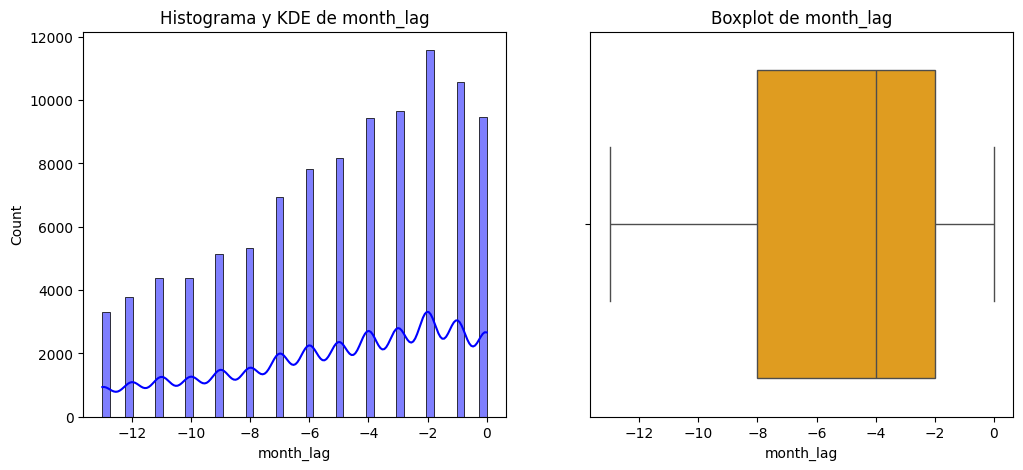


Variable: purchase_amount
- Valores nulos: 0


KeyboardInterrupt: 

: 

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define las columnas numéricas
numerical_vars = ['installments', 'month_lag', 'purchase_amount']

# Procesar el archivo en chunks
chunk_size = 100000  # Número de filas por chunk
for chunk in pd.read_csv('src/historical_transactions.csv', chunksize=chunk_size):
    for col in numerical_vars:
        print(f"\nVariable: {col}")
        print(f"- Valores nulos: {chunk[col].isnull().sum()}")

        plt.figure(figsize=(12, 5))

        # Histograma y KDE
        plt.subplot(1, 2, 1)
        sns.histplot(chunk[col].dropna(), kde=True, color='blue')
        plt.title(f'Histograma y KDE de {col}')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(x=chunk[col].dropna(), color='orange')
        plt.title(f'Boxplot de {col}')

        plt.show()

In [30]:
# Verificación de valores nulos
print("\nValores nulos en el conjunto de datos:")
print(vdf_hist_trans.isnull().sum())


Valores nulos en el conjunto de datos:
authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64


# 5.Análisis Multivariado

In [32]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('src/train.csv')
df['first_active_month'] = pd.to_datetime(df['first_active_month'])

# Definir fecha de referencia
fecha_referencia = pd.to_datetime('2018-03-01')  # puede ajustarse si sabes la fecha real de corte

# Calcular la cantidad de meses activos hasta la fecha de referencia
df['meses_actividad'] = (fecha_referencia.to_period('M') - df['first_active_month'].dt.to_period('M')).apply(lambda x: x.n)


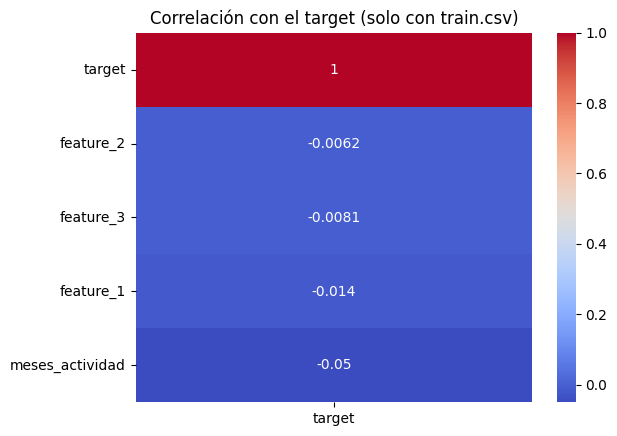

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# columnas numéricas relevantes
corr_cols = ['feature_1', 'feature_2', 'feature_3', 'meses_actividad', 'target']
corr = df[corr_cols].corr()

# Visualizamos la correlación con el target
sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con el target (solo con train.csv)')
plt.show()


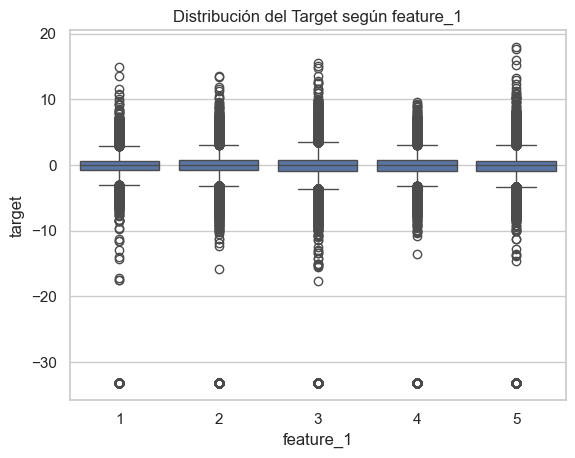

Promedio del Target por feature_1:
feature_1
1   -0.315476
2   -0.350452
3   -0.377533
4   -0.404652
5   -0.499879
Name: target, dtype: float64
--------------------------------------------------


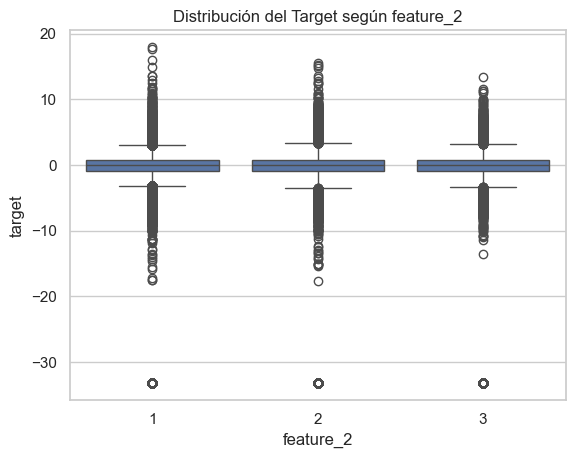

Promedio del Target por feature_2:
feature_2
2   -0.332899
1   -0.398675
3   -0.501889
Name: target, dtype: float64
--------------------------------------------------


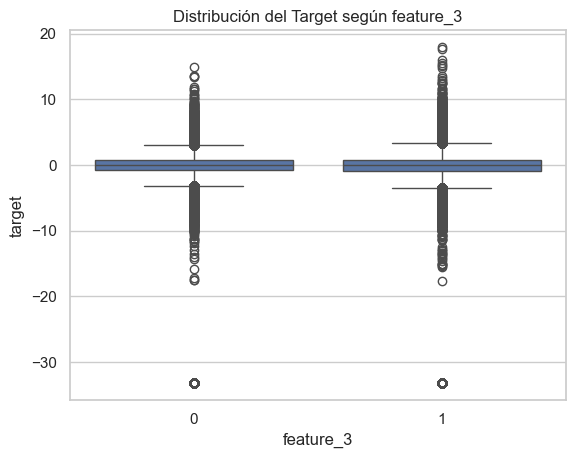

Promedio del Target por feature_3:
feature_3
0   -0.357939
1   -0.421057
Name: target, dtype: float64
--------------------------------------------------


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['feature_1', 'feature_2', 'feature_3']
# Cargar el dataset
train = pd.read_csv('src/train.csv')

for feature in features:
    # Gráfico boxplot
    sns.boxplot(data=train, x=feature, y='target')
    plt.title(f'Distribución del Target según {feature}')
    plt.show()

    # Promedio agrupado por la feature
    print(f"Promedio del Target por {feature}:")
    print(train.groupby(feature)['target'].mean().sort_values(ascending=False))
    print("-" * 50)


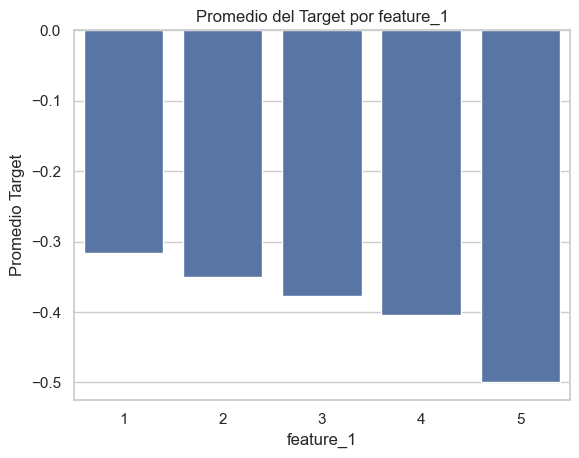

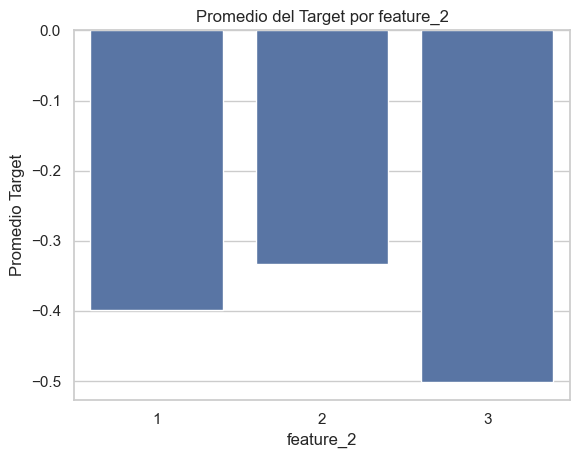

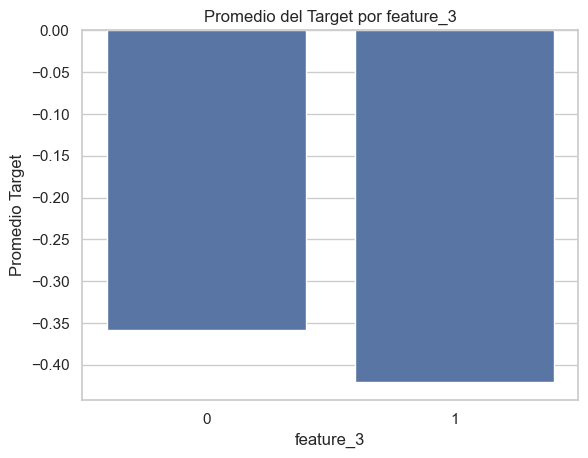

In [34]:
for feature in features:
    means = train.groupby(feature)['target'].mean().sort_values(ascending=False)
    sns.barplot(x=means.index, y=means.values)
    plt.title(f'Promedio del Target por {feature}')
    plt.xlabel(feature)
    plt.ylabel('Promedio Target')
    plt.show()


In [35]:
for feature in features:
    summary = train.groupby(feature)['target'].agg(['mean', 'median', 'std', 'count']).sort_values(by='mean', ascending=False)
    print(f"Resumen estadístico del target por {feature}:\n")
    print(summary)
    print("-" * 50)


Resumen estadístico del target por feature_1:

               mean    median       std  count
feature_1                                     
1         -0.315476 -0.011003  3.407106  12037
2         -0.350452  0.000000  3.756032  55797
3         -0.377533 -0.036539  3.834499  73573
4         -0.404652  0.000000  3.817954  19885
5         -0.499879 -0.056208  4.134833  40625
--------------------------------------------------
Resumen estadístico del target por feature_2:

               mean    median       std  count
feature_2                                     
2         -0.332899 -0.045086  3.567683  74839
1         -0.398675 -0.002394  3.890548  89242
3         -0.501889 -0.033784  4.269270  37836
--------------------------------------------------
Resumen estadístico del target por feature_3:

               mean    median       std   count
feature_3                                      
0         -0.357939  0.000000  3.724459   87719
1         -0.421057 -0.044637  3.944379  114198
-

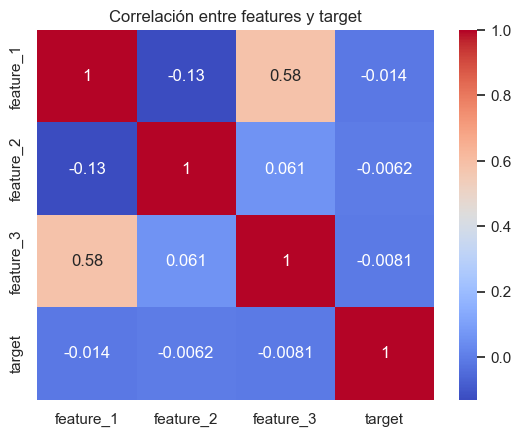

In [36]:
sns.heatmap(train[features + ['target']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlación entre features y target')
plt.show()


Correlación con el target:
feature_1: correlación ≈ -0.014

Muy cercana a 0 → sin correlación lineal significativa con el target.

feature_2: correlación ≈ -0.0062

Igual que feature_1, prácticamente nula. No aporta relación lineal útil.

feature_3: correlación ≈ -0.0081

También sin correlación lineal significativa.

Correlación entre features:
feature_1 y feature_3: 0.58

Correlación moderadamente fuerte y positiva.

Esto sugiere posible redundancia (podrían estar aportando información similar).

feature_1 y feature_2: -0.13 (ligeramente negativa)

feature_2 y feature_3: 0.061 (muy débil)

In [37]:
import pandas as pd
from datetime import datetime

# Convertir la columna a datetime
train['first_active_month'] = pd.to_datetime(train['first_active_month'])

# Fecha de referencia
fecha_corte = datetime(2018, 3, 1)

# Calcular antigüedad en meses
train['antiguedad_tarjeta_meses'] = (fecha_corte.year - train['first_active_month'].dt.year) * 12 + (fecha_corte.month - train['first_active_month'].dt.month)

# Mostrar resultado
print(train[['first_active_month', 'antiguedad_tarjeta_meses']].head())


  first_active_month  antiguedad_tarjeta_meses
0         2017-06-01                         9
1         2017-01-01                        14
2         2016-08-01                        19
3         2017-09-01                         6
4         2017-11-01                         4


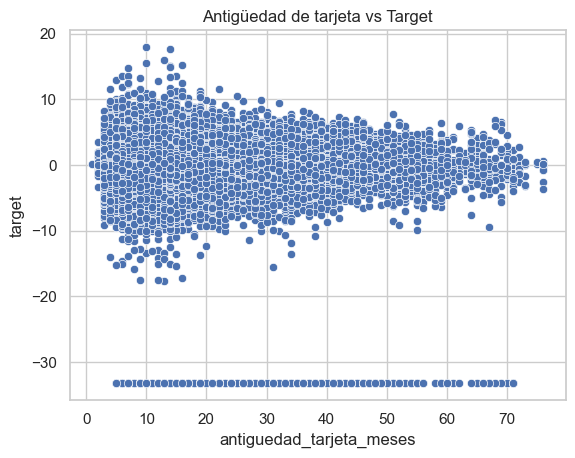

In [38]:
sns.scatterplot(x='antiguedad_tarjeta_meses', y='target', data=train)
plt.title('Antigüedad de tarjeta vs Target')
plt.show()


In [39]:
train['target'].value_counts().head(10)


target
-33.219281    2207
 0.000000     1630
 1.000000      117
-1.000000       81
-0.584963       35
 0.584963       28
-1.321928       19
 0.284918       17
 1.584963       14
 0.342052       13
Name: count, dtype: int64

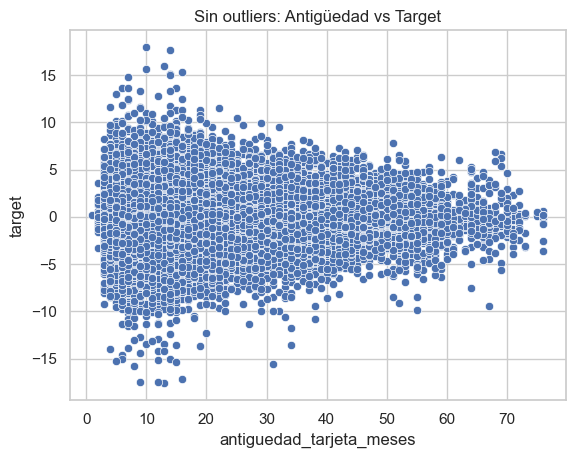

In [40]:
# Filtrar outliers extremos
train_filtrado = train[train['target'] > -30]

# Ver relación con antigüedad
sns.scatterplot(x='antiguedad_tarjeta_meses', y='target', data=train_filtrado)
plt.title('Sin outliers: Antigüedad vs Target')
plt.show()


antiguedad_grupo
0-12    -0.217745
13-24   -0.589676
25-36   -0.671942
37-48   -0.671680
49-60   -0.851753
61-72   -1.277757
Name: target, dtype: float64


C:\Users\Paul\AppData\Local\Temp\ipykernel_33000\2349026940.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grupo_mean = train.groupby('antiguedad_grupo')['target'].mean()


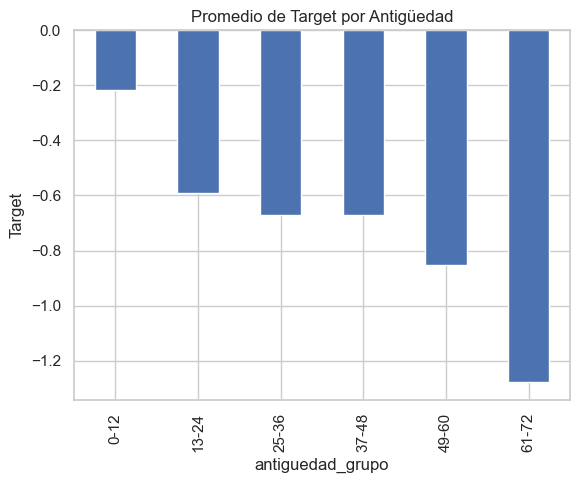

In [41]:
# Crear grupos por rango de antigüedad
train['antiguedad_grupo'] = pd.cut(train['antiguedad_tarjeta_meses'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12','13-24','25-36','37-48','49-60','61-72'])

# Media del target por grupo
grupo_mean = train.groupby('antiguedad_grupo')['target'].mean()

print(grupo_mean)
grupo_mean.plot(kind='bar', title='Promedio de Target por Antigüedad')
plt.ylabel('Target')
plt.show()


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = train[['feature_1', 'feature_2', 'feature_3', 'antiguedad_tarjeta_meses']]
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LinearRegression()
modelo.fit(X_train, y_train)

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Coeficientes: [-0.04489186 -0.01074007  0.07607236 -0.0198778 ]
Intercepto: -0.009306342107127996


In [44]:
from sklearn.ensemble import RandomForestRegressor

modelo_rf = RandomForestRegressor()
modelo_rf.fit(X_train, y_train)

importances = modelo_rf.feature_importances_
for f, imp in zip(X.columns, importances):
    print(f"{f}: {imp:.4f}")


feature_1: 0.1153
feature_2: 0.0784
feature_3: 0.0285
antiguedad_tarjeta_meses: 0.7778


In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada:", pca.explained_variance_ratio_)


Varianza explicada: [0.41450771 0.28968419]


A partir del análisis realizado, se observa que las relaciones lineales entre las variables independientes (feature_1, feature_2, feature_3 y antiguedad_tarjeta_meses) y el target son bastante débiles, según los coeficientes obtenidos por regresión lineal. Sin embargo, al utilizar un modelo de Random Forest, se evidencia que la variable antiguedad_tarjeta_meses tiene una importancia significativamente mayor que el resto, representando cerca del 78% de la importancia total. Esto sugiere que existen relaciones no lineales entre las variables y el target que no son captadas por modelos lineales. Además, el análisis de componentes principales (PCA) indica que dos componentes explican aproximadamente el 70% de la varianza, lo cual respalda la posibilidad de reducir la dimensionalidad sin perder demasiada información. Estos hallazgos resaltan la necesidad de emplear modelos más complejos para capturar adecuadamente las relaciones entre las variables.

In [47]:
import pandas as pd

# Cargar transacciones nuevas
new_trans = pd.read_csv("src/new_merchant_transactions.csv")

# Convertir fechas
new_trans["purchase_date"] = pd.to_datetime(new_trans["purchase_date"])


In [48]:
# Cargar transacciones históricas
hist_trans = pd.read_csv("src/historical_transactions.csv")

# Convertir fechas
hist_trans["purchase_date"] = pd.to_datetime(hist_trans["purchase_date"])


In [49]:
agg_new = new_trans.groupby("card_id").agg({
    "purchase_amount": ["sum", "mean", "min", "max", "std"],
    "installments": ["mean", "max", "min", "std"],
    "month_lag": ["min", "max", "mean"],
    "authorized_flag": lambda x: (x == "Y").mean()
}).reset_index()

# Aplanar columnas
agg_new.columns = ["card_id"] + ["new_" + "_".join(col).strip() for col in agg_new.columns[1:]]


In [50]:
agg_hist = hist_trans.groupby("card_id").agg({
    "purchase_amount": ["sum", "mean", "min", "max", "std"],
    "installments": ["mean", "max", "min", "std"],
    "month_lag": ["min", "max", "mean"],
    "authorized_flag": lambda x: (x == "Y").mean()
}).reset_index()

# Aplanar columnas
agg_hist.columns = ["card_id"] + ["hist_" + "_".join(col).strip() for col in agg_hist.columns[1:]]


In [51]:
merchants = pd.read_csv("src/merchants.csv")

new_trans = new_trans.merge(merchants, on="merchant_id", how="left")


In [52]:
train = pd.read_csv("src/train.csv")

# Merge con las transacciones nuevas agregadas
train_merged = train.merge(agg_new, on="card_id", how="left")
# Merge con las transacciones históricas agregadas
train_merged = train_merged.merge(agg_hist, on="card_id", how="left")



In [53]:
from datetime import datetime

train_merged["first_active_month"] = pd.to_datetime(train_merged["first_active_month"])
fecha_corte = datetime(2018, 3, 1)
train_merged["antiguedad_tarjeta_meses"] = (
    (fecha_corte.year - train_merged["first_active_month"].dt.year) * 12 +
    (fecha_corte.month - train_merged["first_active_month"].dt.month)
)


In [54]:
print(train_merged.columns)


Index(['first_active_month', 'card_id', 'feature_1', 'feature_2', 'feature_3',
       'target', 'new_purchase_amount_sum', 'new_purchase_amount_mean',
       'new_purchase_amount_min', 'new_purchase_amount_max',
       'new_purchase_amount_std', 'new_installments_mean',
       'new_installments_max', 'new_installments_min', 'new_installments_std',
       'new_month_lag_min', 'new_month_lag_max', 'new_month_lag_mean',
       'new_authorized_flag_<lambda>', 'hist_purchase_amount_sum',
       'hist_purchase_amount_mean', 'hist_purchase_amount_min',
       'hist_purchase_amount_max', 'hist_purchase_amount_std',
       'hist_installments_mean', 'hist_installments_max',
       'hist_installments_min', 'hist_installments_std', 'hist_month_lag_min',
       'hist_month_lag_max', 'hist_month_lag_mean',
       'hist_authorized_flag_<lambda>', 'antiguedad_tarjeta_meses'],
      dtype='object')


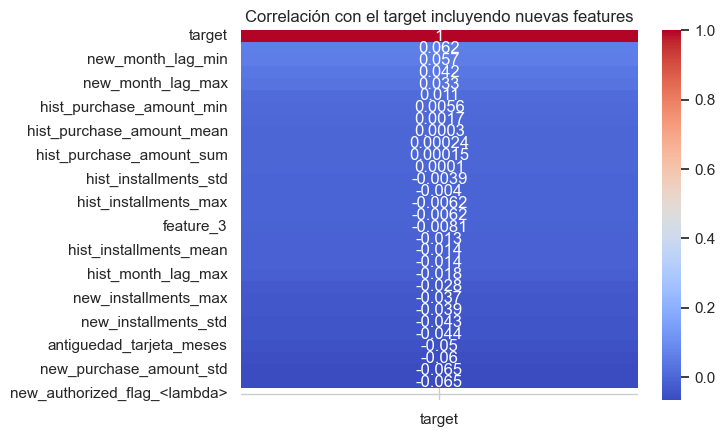

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_relevantes = [
    'feature_1', 'feature_2', 'feature_3',
    'antiguedad_tarjeta_meses',

    # columnas de transacciones nuevas
    'new_purchase_amount_sum', 'new_purchase_amount_mean', 'new_purchase_amount_min', 'new_purchase_amount_max', 'new_purchase_amount_std',
    'new_installments_mean', 'new_installments_max', 'new_installments_min', 'new_installments_std',
    'new_month_lag_min', 'new_month_lag_max', 'new_month_lag_mean',
    'new_authorized_flag_<lambda>',

    # columnas de transacciones históricas
    'hist_purchase_amount_sum', 'hist_purchase_amount_mean', 'hist_purchase_amount_min', 'hist_purchase_amount_max', 'hist_purchase_amount_std',
    'hist_installments_mean', 'hist_installments_max', 'hist_installments_min', 'hist_installments_std',
    'hist_month_lag_min', 'hist_month_lag_max', 'hist_month_lag_mean',
    'hist_authorized_flag_<lambda>',

    'target'
]


corr = train_merged[cols_relevantes].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr[['target']].sort_values(by='target', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlación con el target incluyendo nuevas features')
plt.show()




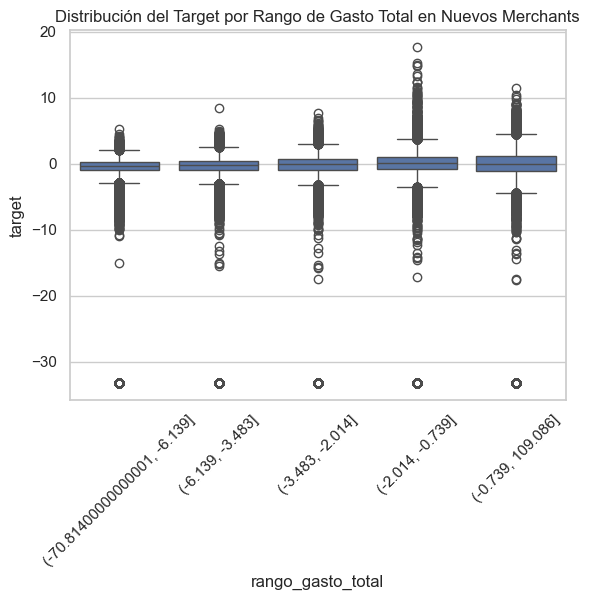

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea rangos de compra total
train_merged['rango_gasto_total'] = pd.qcut(train_merged['new_purchase_amount_sum'], q=5, duplicates='drop')

sns.boxplot(x='rango_gasto_total', y='target', data=train_merged)
plt.title('Distribución del Target por Rango de Gasto Total en Nuevos Merchants')
plt.xticks(rotation=45)
plt.show()


La mediana del target en cada rango parece estar cercana a cero o ligeramente negativa para los primeros cuatro rangos.

En el rango de gasto más alto (último bin, positivo grande) la mediana parece un poco más alta (cercana a cero o ligeramente positiva), indicando que los clientes con gasto muy alto en nuevos merchants tienden a tener un target promedio algo mejor (mayor).

El gasto en nuevos merchants por sí solo no es un predictor sólido o exclusivo para el target, ya que hay mucha variabilidad dentro de cada rango.

Sin embargo, un mayor gasto total tiende a estar asociado a una ligera mejora del target promedio.

Deberías combinar esta variable con otras (como las históricas o características del cliente) para obtener mejores predicciones.

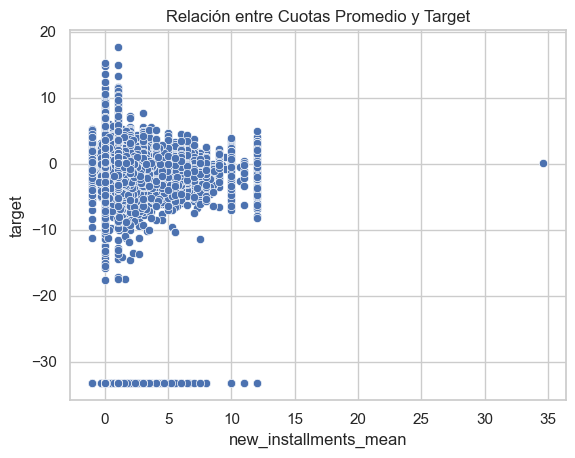

In [57]:
sns.scatterplot(x='new_installments_mean', y='target', data=train_merged)
plt.title('Relación entre Cuotas Promedio y Target')
plt.show()


La mayoría de los datos están concentrados con un promedio de cuotas (new_installments_mean) entre 0 y aproximadamente 10.

Fuera de ese rango (por ejemplo, el punto aislado con cuotas cercanas a 35), son casos muy poco frecuentes y probablemente atípicos.

Hay algunos outliers evidentes tanto en cuotas promedio (punto muy alto) como en target (valores extremos positivos y negativos).

Podría ser útil analizar esos outliers por separado o aplicar transformaciones/filtrado para entender mejor la relación.

La variable new_installments_mean probablemente no tenga una correlación fuerte con el target, por lo que debería usarse combinada con otras variables.

Es importante validar si esta variable aporta algo en modelos más complejos, como árboles o modelos no lineales.



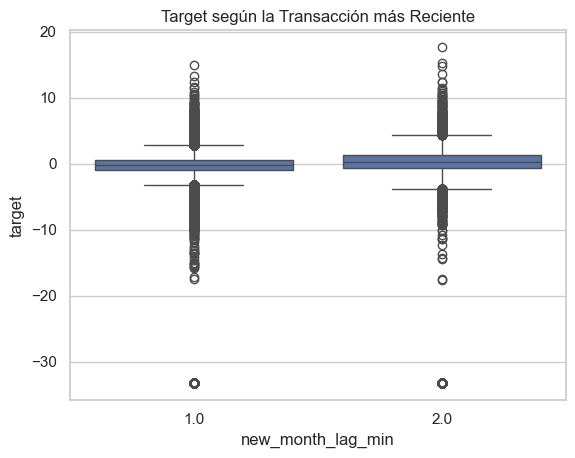

In [58]:
sns.boxplot(x='new_month_lag_min', y='target', data=train_merged)
plt.title('Target según la Transacción más Reciente')
plt.show()


## Uso de Historical


# 6.Exploración Avanzada

In [59]:
# Asegúrate de que la columna 'purchase_date' exista y esté en formato de fecha
vdf_new_trans['purchase_date'] = pd.to_datetime(vdf_new_trans['purchase_date'], errors='coerce')
# Eliminar filas con fechas inválidas
vdf_new_trans = vdf_new_trans.dropna(subset=['purchase_date'])



In [60]:
# Extraer componentes temporales
vdf_new_trans['year'] = vdf_new_trans['purchase_date'].dt.year
vdf_new_trans['month'] = vdf_new_trans['purchase_date'].dt.month
vdf_new_trans['day'] = vdf_new_trans['purchase_date'].dt.day
vdf_new_trans['dayofweek'] = vdf_new_trans['purchase_date'].dt.dayofweek
vdf_new_trans['weekofyear'] = vdf_new_trans['purchase_date'].dt.isocalendar().week


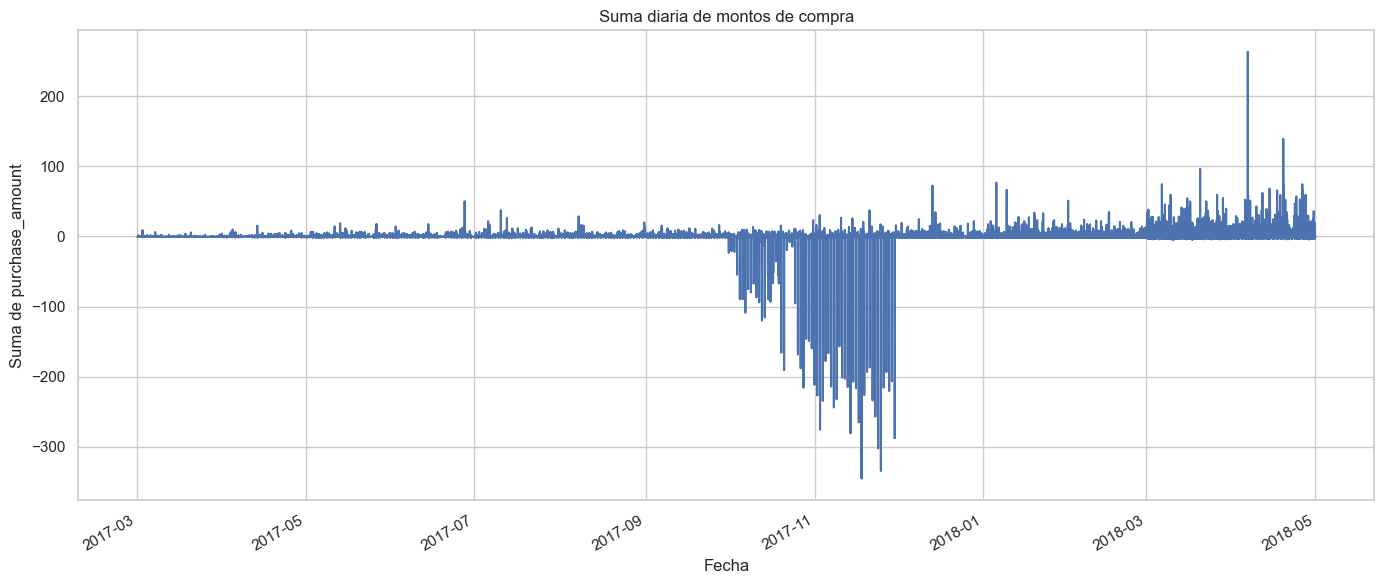

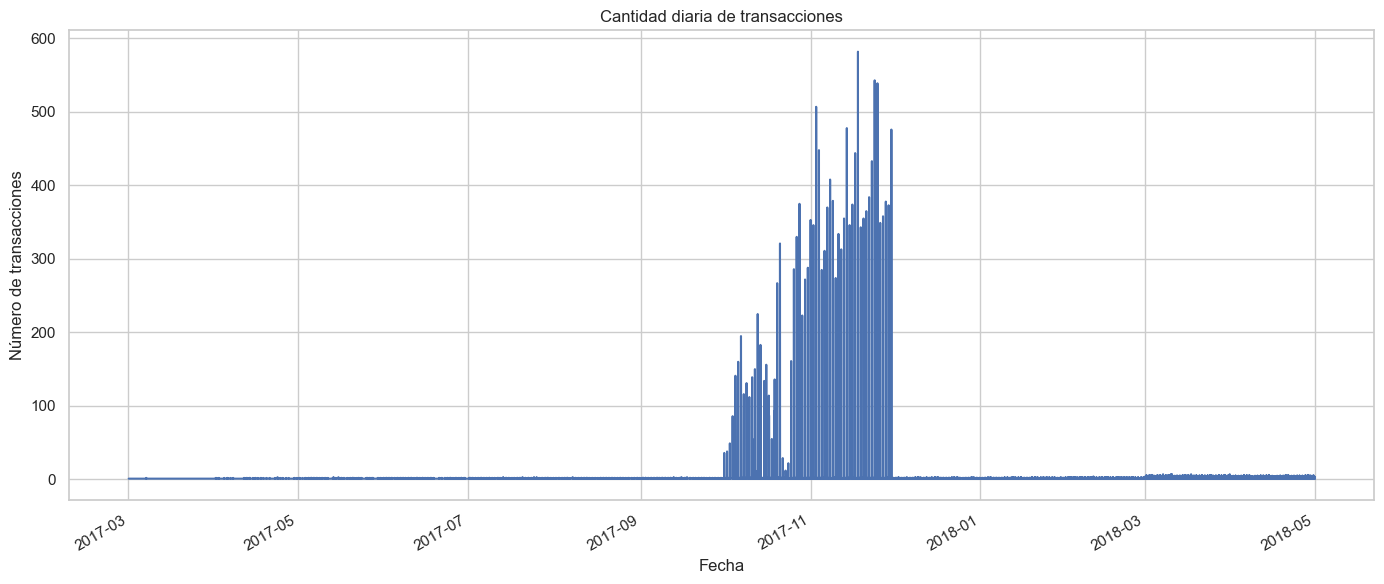

In [61]:
import matplotlib.pyplot as plt
# Agrupar por fecha para obtener la suma de montos de compra
daily_sum = vdf_new_trans.groupby('purchase_date')['purchase_amount'].sum()

plt.figure(figsize=(14,6))
daily_sum.plot()
plt.title('Suma diaria de montos de compra')
plt.ylabel('Suma de purchase_amount')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()

# Agrupar por fecha para contar número de transacciones
daily_count = vdf_new_trans.groupby('purchase_date').size()

plt.figure(figsize=(14,6))
daily_count.plot()
plt.title('Cantidad diaria de transacciones')
plt.ylabel('Número de transacciones')
plt.xlabel('Fecha')
plt.grid(True)
plt.tight_layout()
plt.show()


La serie temporal obtenida muestra que la mayoría de los días presentan una suma total de compras negativa, con algunos picos positivos que destacan en ciertas fechas. Este comportamiento puede parecer contradictorio si se espera que los montos de compra representen valores monetarios reales, pero tiene una justificación razonable dentro del contexto de los datos.

Los valores negativos no indican necesariamente pérdidas o reembolsos. En este caso, la variable purchase_amount se encuentra normalizada o transformada debido a que los datos provienen de una competencia de Kaggle. Este tipo de competencias, por razones de privacidad, anonimización y equidad en el modelado, suele aplicar transformaciones a las variables numéricas. Es probable que se haya aplicado una escala logarítmica, un centrado en la media, una estandarización (z-score) o alguna forma de codificación numérica para ocultar los valores reales. Esto explica que el promedio del purchase_amount sea negativo, y que incluso el valor máximo (263.15) sea significativamente más alto que la mayoría de observaciones.

En este sentido, lo que importa en el análisis no es el valor absoluto, sino el comportamiento relativo entre días, los patrones temporales y la posible presencia de estacionalidad, picos o tendencias que podrían correlacionarse con otras variables o con el comportamiento futuro de los comerciantes.

In [62]:
vdf_new_trans['purchase_amount'].describe()

count    1.963031e+06
mean    -5.509690e-01
std      6.940043e-01
min     -7.468928e-01
25%     -7.166294e-01
50%     -6.748406e-01
75%     -5.816162e-01
max      2.631575e+02
Name: purchase_amount, dtype: float64

In [63]:

#Agrupar por merchant_category_id
grouped = vdf_new_trans.groupby('merchant_category_id').agg(
    transaction_count = ('purchase_amount', 'count'),
    total_purchase_amount = ('purchase_amount', 'sum'),
    average_purchase_amount = ('purchase_amount', 'mean')
).reset_index()

#Se ordena por total_purchase_amount descendente
grouped_sorted = grouped.sort_values(by='total_purchase_amount', ascending=False)

print(grouped_sorted.head(10))  # Mostrar top 10 categorías con más ventas


     merchant_category_id  transaction_count  total_purchase_amount  \
72                    210               3803            4492.303862   
113                   333               4817            3333.705812   
157                   434               8812            1639.711224   
178                   491               2687            1168.620884   
289                   808                587             717.675174   
134                   385                871             517.335378   
126                   363               3694             478.883330   
82                    245                 85             432.797710   
203                   550               1757             265.057030   
114                   334                 15             246.751252   

     average_purchase_amount  
72                  1.181253  
113                 0.692071  
157                 0.186077  
178                 0.434917  
289                 1.222615  
134                 0.593956  
1

Se realizó un análisis agrupando las transacciones por el campo merchant_category_id, con el objetivo de identificar cuáles son las categorías de comerciantes con mayor volumen y frecuencia de actividad comercial. Para ello, se calcularon tres indicadores principales: el número total de transacciones por categoría, la suma total de los montos de compra y el promedio del monto por transacción.

Los resultados muestran que la categoría 210 es la más destacada, con un total de 3803 transacciones y una suma acumulada de compras de 4492.30 unidades monetarias. Esto indica un alto volumen de actividad con un monto promedio por transacción de 1.18. La segunda categoría más relevante es la 333, que registra incluso más transacciones (4817), pero con un monto total menor (3333.71), lo que revela un menor valor promedio por transacción de 0.69. Esto puede interpretarse como una categoría donde las compras son muy frecuentes, pero de bajo importe unitario.

In [64]:
#Agrupamiento inicial por tipo de comercio o categoría.
grouped_subsector = vdf_new_trans.groupby('subsector_id').agg(
    transaction_count = ('purchase_amount', 'count'),
    total_purchase_amount = ('purchase_amount', 'sum'),
    average_purchase_amount = ('purchase_amount', 'mean')
).reset_index()

print(grouped_subsector.sort_values(by='total_purchase_amount', ascending=False).head(10))


    subsector_id  transaction_count  total_purchase_amount  \
34            35               5233            4144.216910   
3              3               6237            2748.925576   
9             10               9849            2041.143283   
5              5               1316               7.048080   
27            28                  8              -5.625385   
0             -1                 20              -5.707430   
10            11                560             -37.123944   
39            40                953            -357.192207   
22            23               1423            -529.921674   
13            14               1488            -673.356672   

    average_purchase_amount  
34                 0.791939  
3                  0.440745  
9                  0.207244  
5                  0.005356  
27                -0.703173  
0                 -0.285371  
10                -0.066293  
39                -0.374808  
22                -0.372398  
13               

El subsector identificado con el mayor monto acumulado de compras fue el 35, que alcanzó más de cuatro mil unidades monetarias distribuidas en poco más de cinco mil transacciones. Esto refleja una actividad comercial destacada y una media de compra por transacción relativamente alta, lo que sugiere una combinación de frecuencia y valor. Le sigue el subsector 3, con más de seis mil transacciones y un volumen total de compras superior a dos mil setecientas unidades, aunque con un ticket promedio más bajo en comparación.

Otro subsector relevante es el 10, que presenta casi diez mil transacciones pero con un volumen total de compras inferior, lo que indica muchas operaciones de bajo monto. También se observa la existencia de subsectores con valores negativos en el total de compras, como los subsectores 28, 23, 14 y 40. Esto puede deberse a devoluciones, reembolsos u otros movimientos financieros inversos que son registrados como montos negativos. Estos comportamientos deben ser tenidos en cuenta al momento de interpretar el desempeño comercial, ya que afectan directamente el balance general de actividad en estos subsectores.

In [68]:
#Agrupar por merchant_category_id
grouped = vdf_new_trans.groupby('merchant_category_id').agg(
    transaction_count = ('purchase_amount', 'count'),
    total_purchase_amount = ('purchase_amount', 'sum'),
    average_purchase_amount = ('purchase_amount', 'mean')
).reset_index()

#Se ordena por total_purchase_amount descendente
grouped_sorted = grouped.sort_values(by='total_purchase_amount', ascending=False)

print(grouped_sorted.head(10))  # Mostrar top 10 categorías con más ventas

     merchant_category_id  transaction_count  total_purchase_amount  \
72                    210               3803            4492.303862   
113                   333               4817            3333.705812   
157                   434               8812            1639.711224   
178                   491               2687            1168.620884   
289                   808                587             717.675174   
134                   385                871             517.335378   
126                   363               3694             478.883330   
82                    245                 85             432.797710   
203                   550               1757             265.057030   
114                   334                 15             246.751252   

     average_purchase_amount  
72                  1.181253  
113                 0.692071  
157                 0.186077  
178                 0.434917  
289                 1.222615  
134                 0.593956  
1

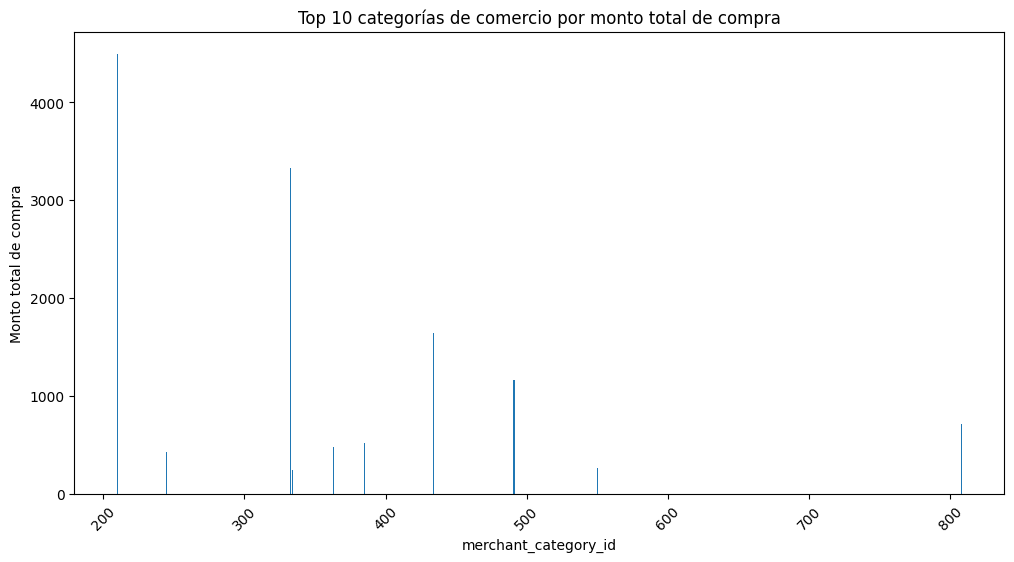

In [ ]:

top_categories = grouped_sorted.head(10)

plt.figure(figsize=(12,6))
plt.bar(top_categories['merchant_category_id'], top_categories['total_purchase_amount'])
plt.title('Top 10 categorías de comercio por monto total de compra')
plt.xlabel('merchant_category_id')
plt.ylabel('Monto total de compra')
plt.xticks(rotation=45)
plt.show()


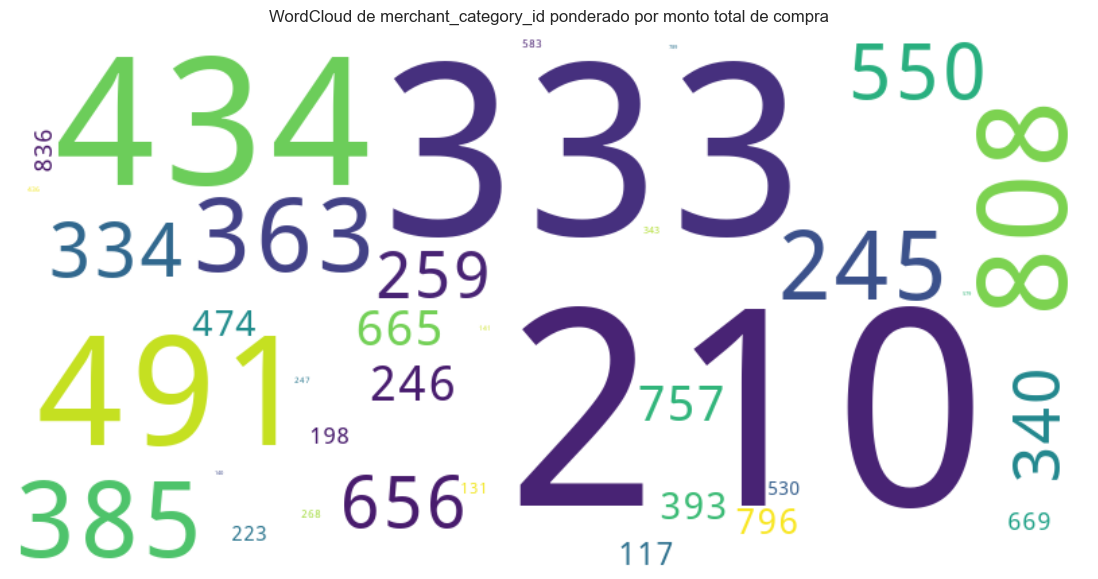

In [77]:
from wordcloud import WordCloud
freq_dict = grouped_sorted.set_index('merchant_category_id')['total_purchase_amount'].to_dict()
freq_dict_str = {str(k): v for k, v in freq_dict.items()}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict_str)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de merchant_category_id ponderado por monto total de compra')
plt.show()


# 7.Calidad de los Datos

## Valores faltantes en Train

                    Valores_faltantes  Porcentaje
first_active_month                  0         0.0
card_id                             0         0.0
feature_1                           0         0.0
feature_2                           0         0.0
feature_3                           0         0.0
target                              0         0.0


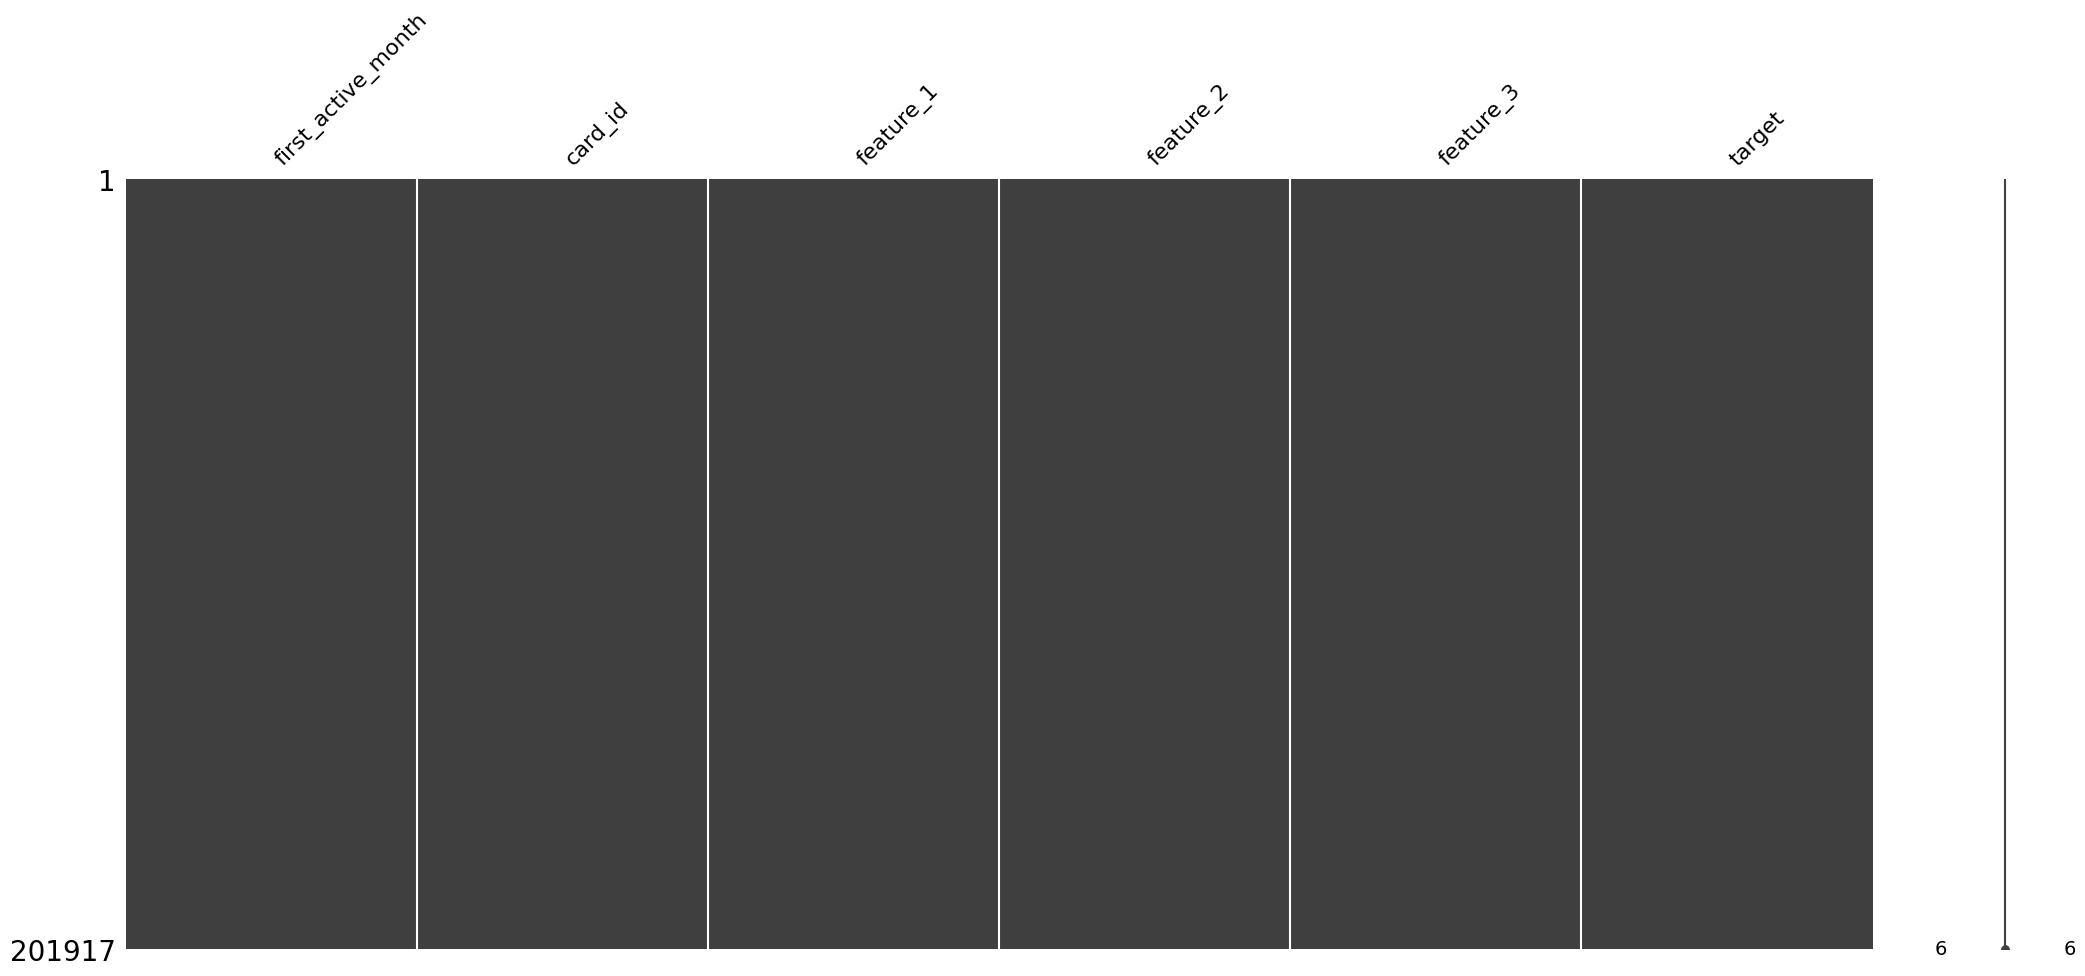

In [ ]:
# Identificación de valores faltantes.
vdf_train = pd.read_csv('src/train.csv')
faltantes_train = vdf_train.isnull().sum()
porcentaje_faltantes = (faltantes_train / len(vdf_train)) * 100
df_faltantes = pd.DataFrame({
    'Valores_faltantes': faltantes_train,
    'Porcentaje': porcentaje_faltantes
})
print(df_faltantes)
#print(df_faltantes[df_faltantes['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_train)
plt.show()

## Valores faltantes en Merchants

                 Valores_faltantes  Porcentaje
avg_sales_lag3                  13    0.003884
avg_sales_lag6                  13    0.003884
avg_sales_lag12                 13    0.003884
category_2                   11887    3.551581


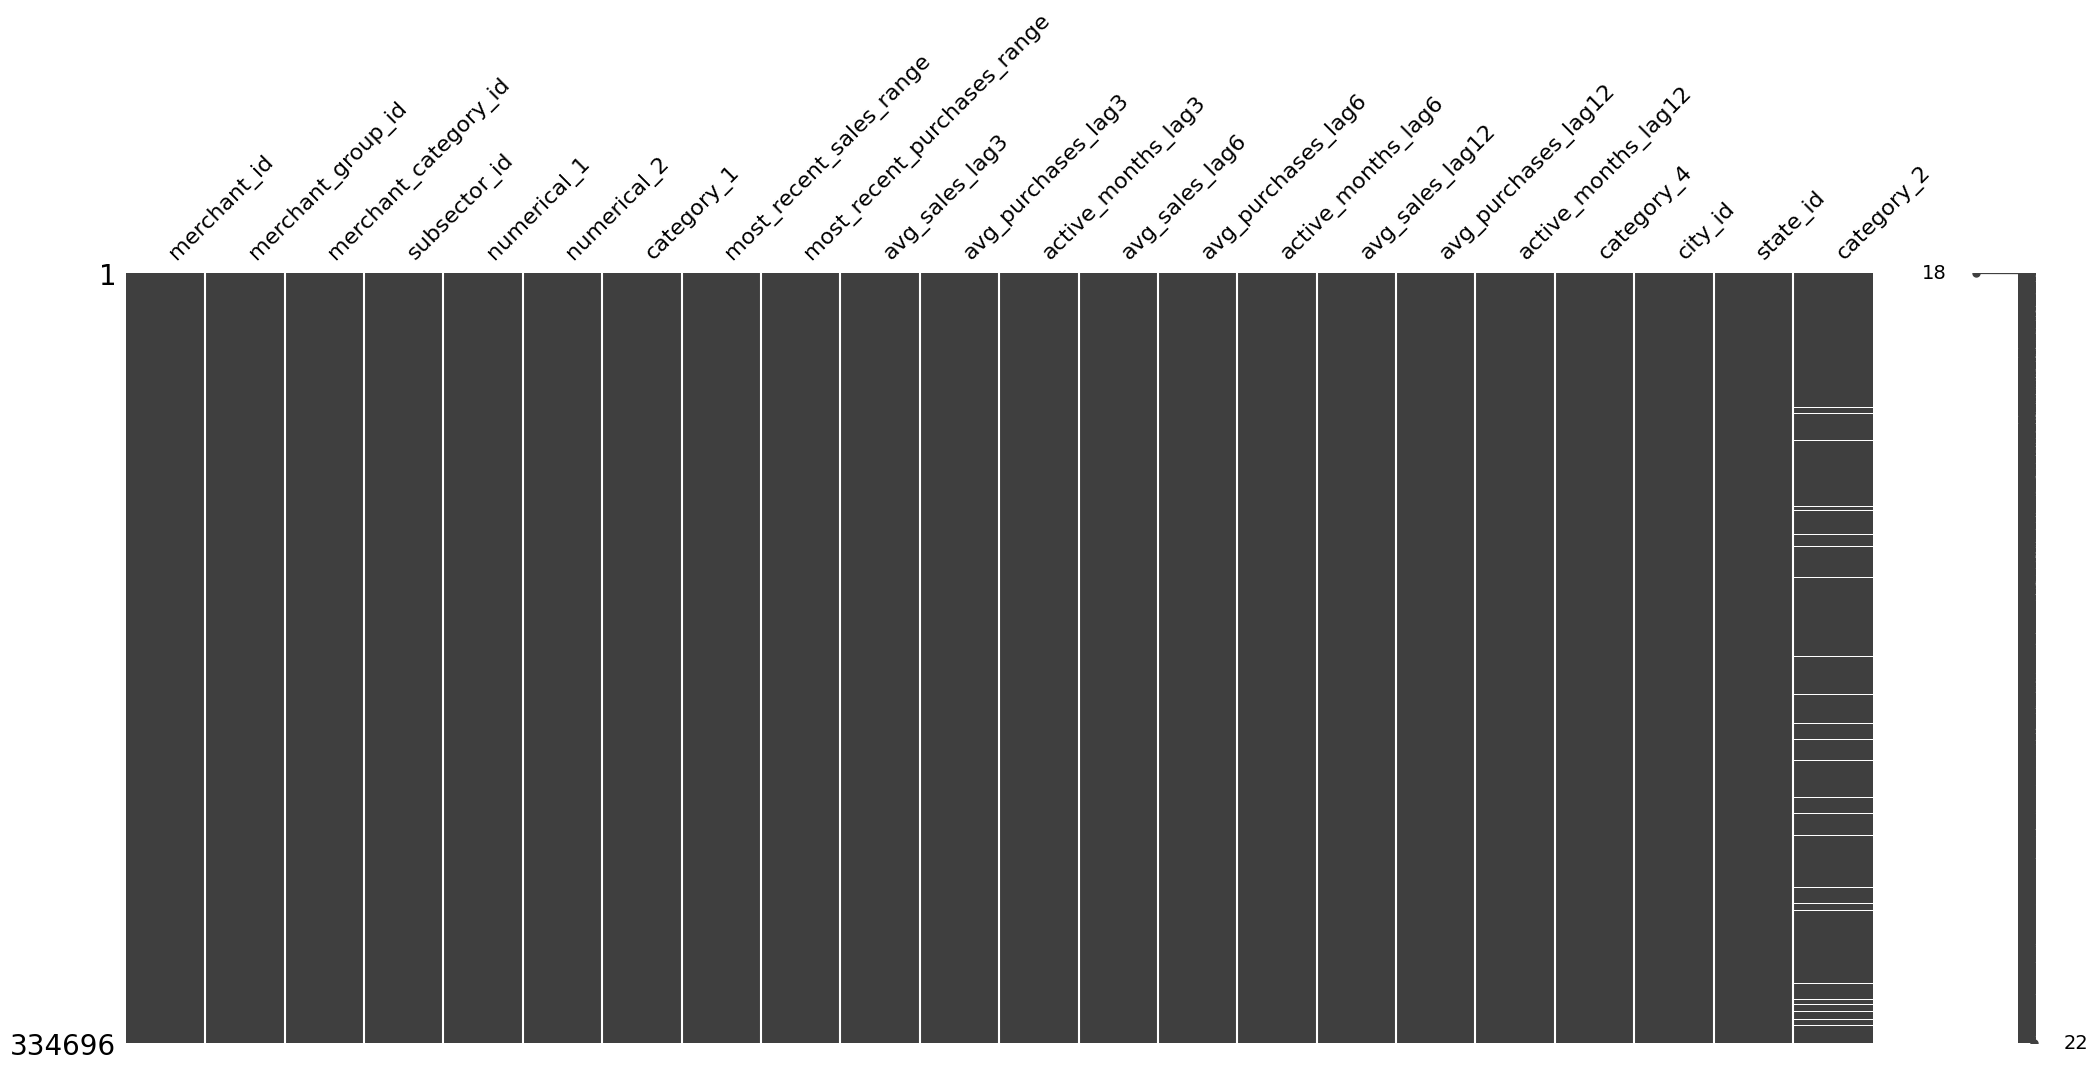

In [ ]:
# Identificación de valores faltantes en merchants.csv
faltantes_merchants = vdf_merchants.isnull().sum()
porcentaje_faltantes_merchants = (faltantes_merchants / len(vdf_merchants)) * 100
df_faltantes_merchants = pd.DataFrame({
    'Valores_faltantes': faltantes_merchants,
    'Porcentaje': porcentaje_faltantes_merchants
})
# print(df_faltantes_merchants)
# print("\n RESUMEN DE VALORES FALTANTES EN MERCHANT")
print(df_faltantes_merchants[df_faltantes_merchants['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_merchants)
plt.show()

## Valores faltantes en New Merchant Transactions

             Valores_faltantes  Porcentaje
category_3               55922    2.848758
merchant_id              26216    1.335486
category_2              111745    5.692473


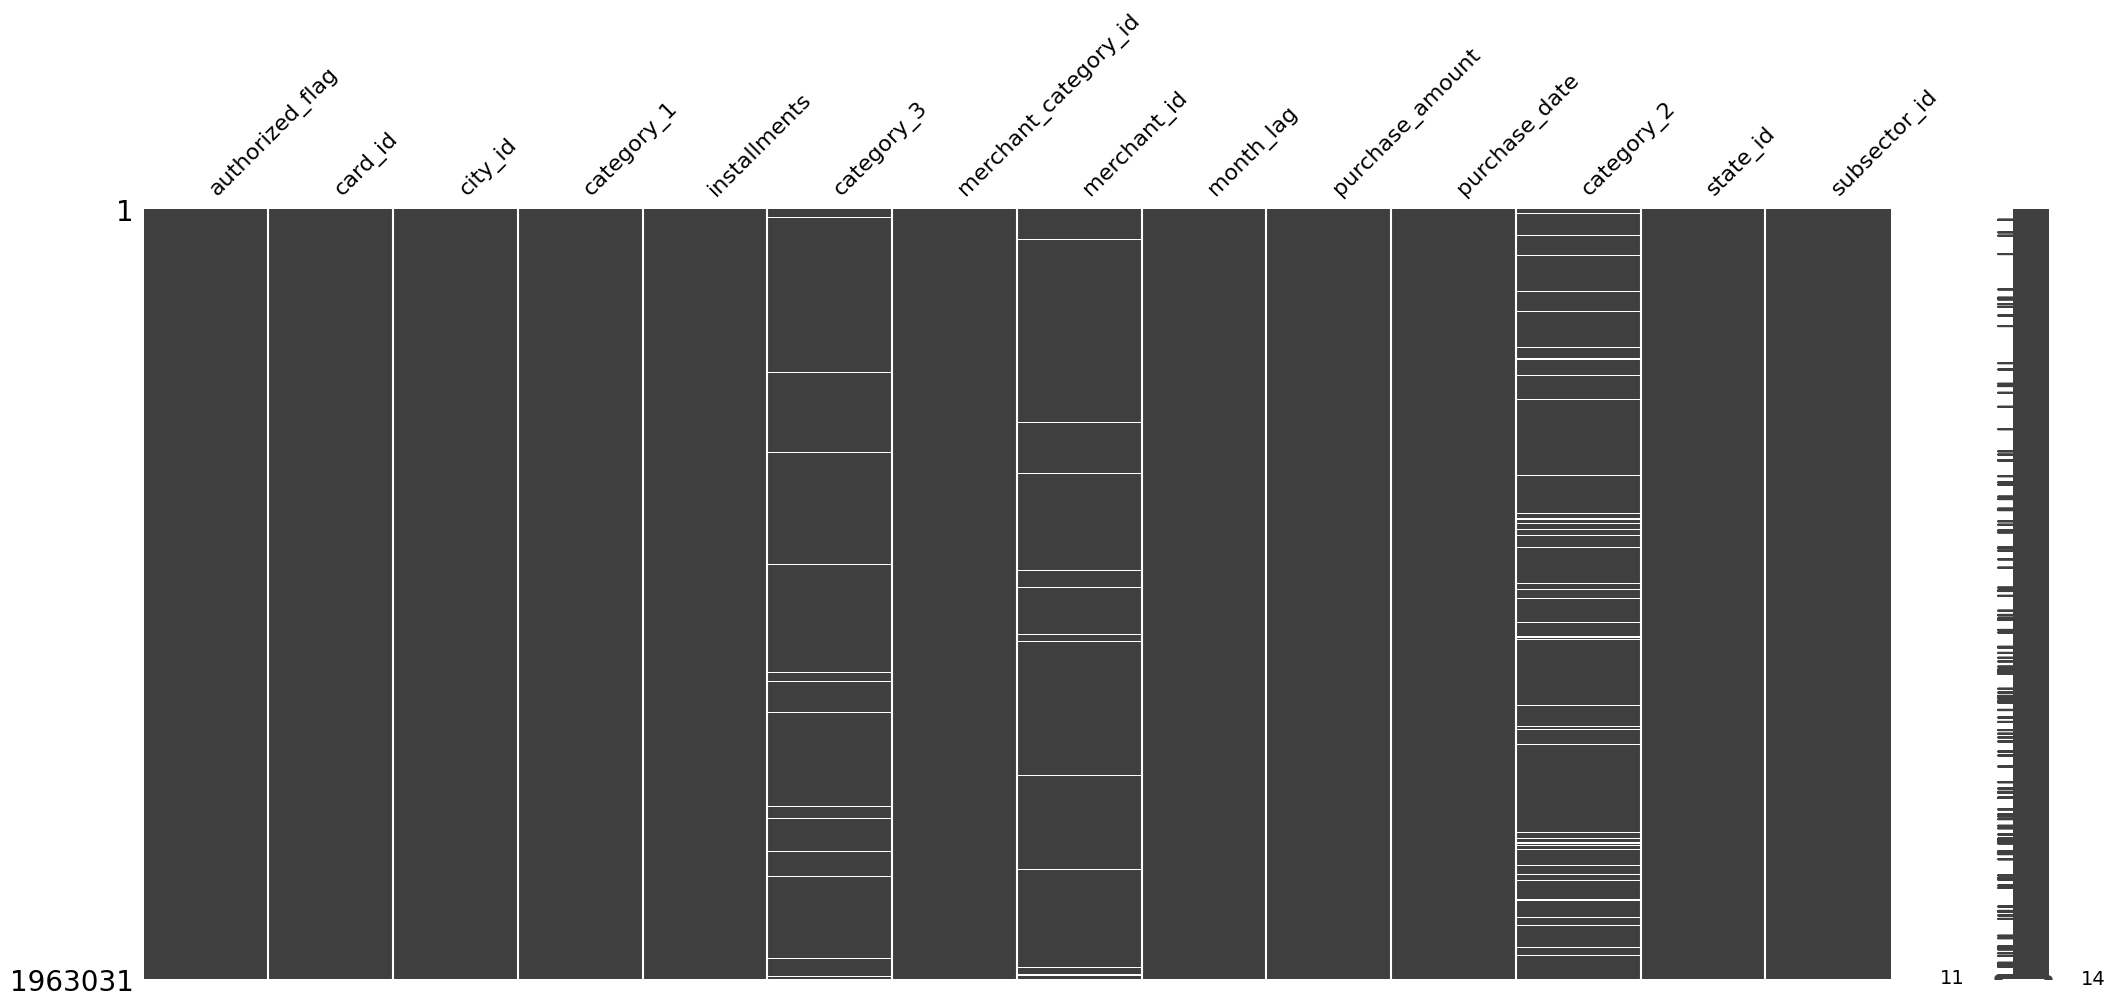

In [ ]:
# Identificación de valores faltantes en new_merchant_transactions.csv
faltantes_new_trans = vdf_new_trans.isnull().sum()
porcentaje_faltantes_new_trans = (faltantes_new_trans / len(vdf_new_trans)) * 100
df_faltantes_new_trans = pd.DataFrame({
    'Valores_faltantes': faltantes_new_trans,
    'Porcentaje': porcentaje_faltantes_new_trans
})
print(df_faltantes_new_trans[df_faltantes_new_trans['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_new_trans)
plt.show()

## Valores faltantes en Historical Transactions

             Valores_faltantes  Porcentaje
category_3              178159    0.611970
merchant_id             138481    0.475678
category_2             2652864    9.112500


c:\Users\Paul\Documents\Projects-vscode\data-mining\venv\Lib\site-packages\matplotlib\image.py:183: UserWarning: Data with more than 2**24 rows cannot be accurately displayed. Downsampling to less than 2**24 rows before displaying. To remove this warning, manually downsample your data.
  warnings.warn(msg.format(n='2**24 rows'))


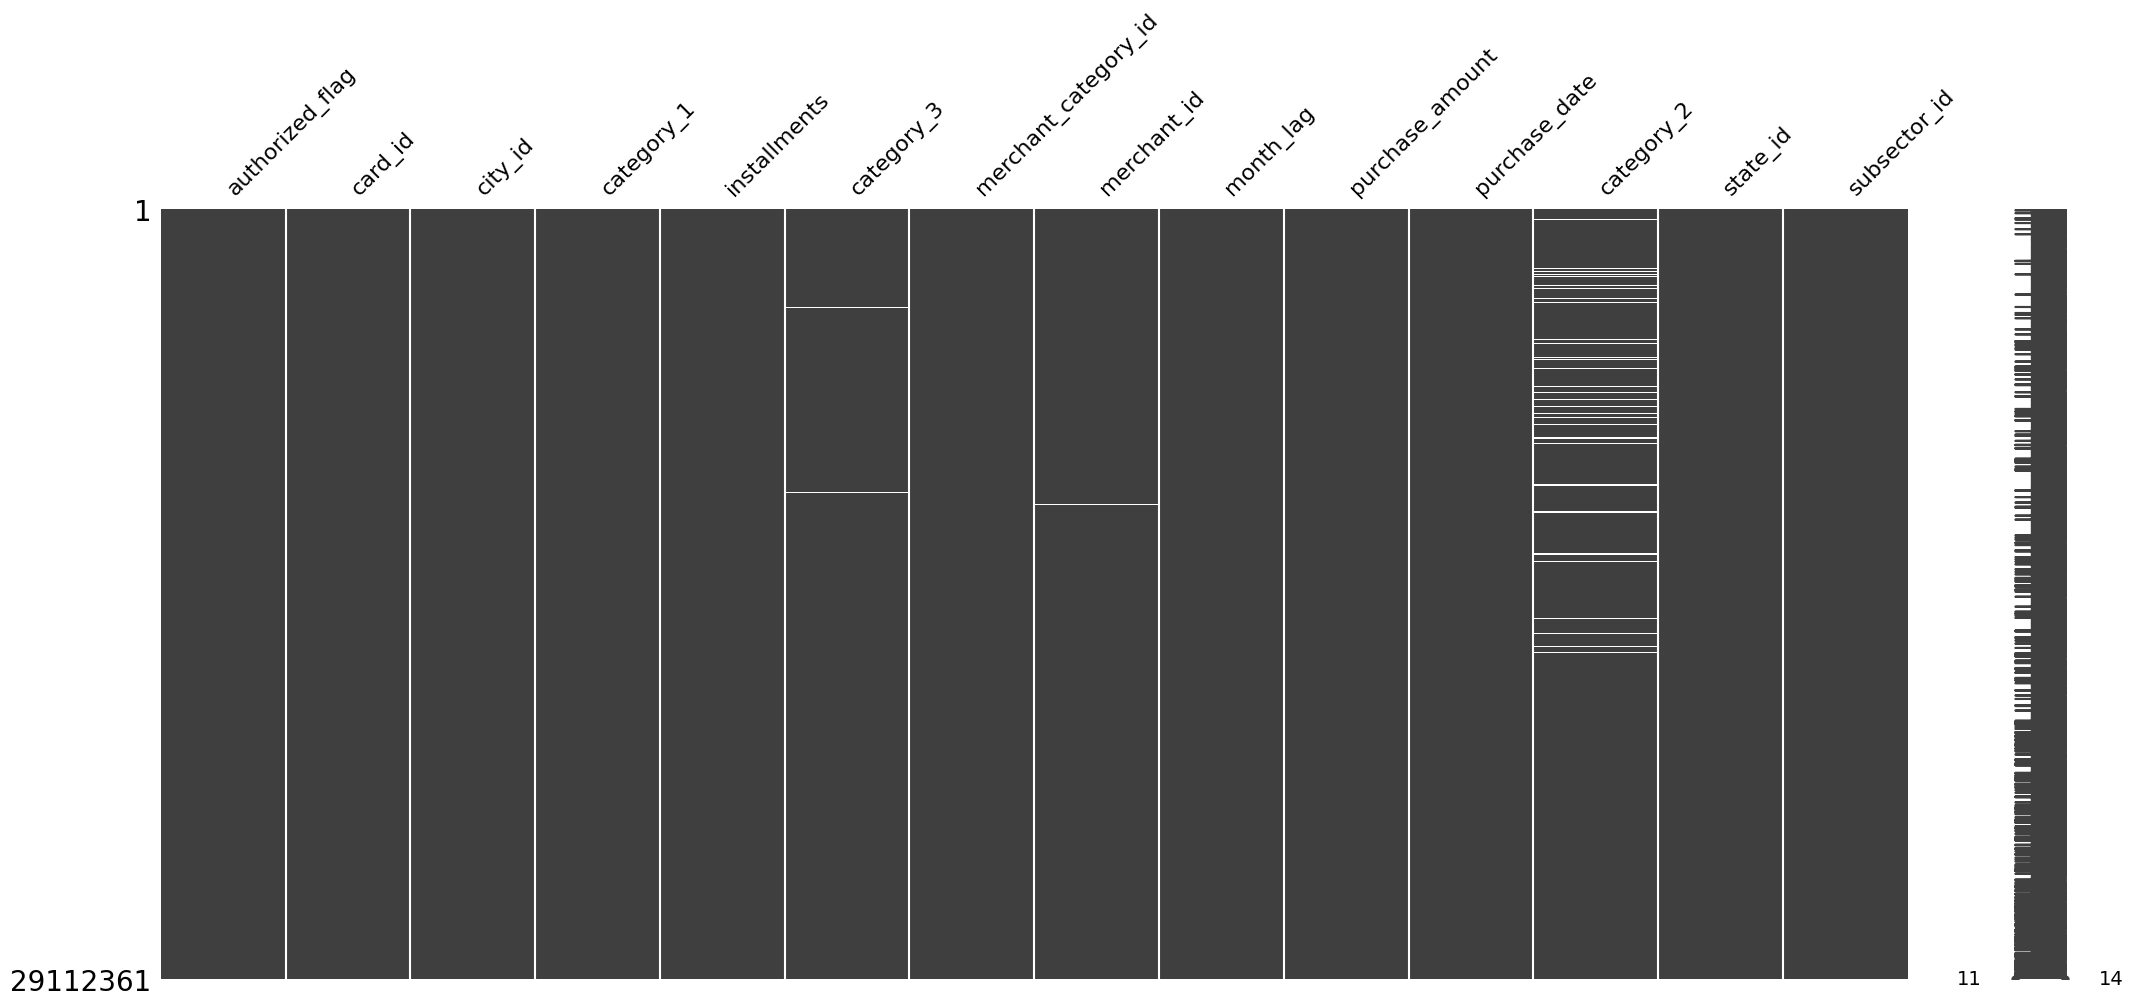

In [ ]:
# Identificación de valores faltantes en historical_transactions.csv
faltantes_hist = vdf_hist_trans.isnull().sum()
porcentaje_faltantes_hist = (faltantes_hist / len(vdf_hist_trans)) * 100
df_faltantes_hist = pd.DataFrame({
    'Valores_faltantes': faltantes_hist,
    'Porcentaje': porcentaje_faltantes_hist
})
print(df_faltantes_hist[df_faltantes_hist['Valores_faltantes'] > 0])

# Visualización rápida
import missingno as msno
msno.matrix(vdf_hist_trans)
plt.show()

## Análisis de duplicados y valores atípicos de Train

Número de filas completamente duplicadas: 0
Columna 'first_active_month': 201842 valores repetidos (75 únicos de 201917)
Columna 'card_id': 0 valores repetidos (201917 únicos de 201917)
Columna 'feature_1': 201912 valores repetidos (5 únicos de 201917)
Columna 'feature_2': 201914 valores repetidos (3 únicos de 201917)
Columna 'feature_3': 201915 valores repetidos (2 únicos de 201917)
Columna 'target': 4807 valores repetidos (197110 únicos de 201917)

Análisis de outliers:
Columna 'feature_1': 0 outliers (rango típico: -1.00 a 7.00)
Columna 'feature_2': 0 outliers (rango típico: -0.50 a 3.50)
Columna 'feature_3': 0 outliers (rango típico: -1.50 a 2.50)
Columna 'target': 15397 outliers (rango típico: -3.36 a 3.24)


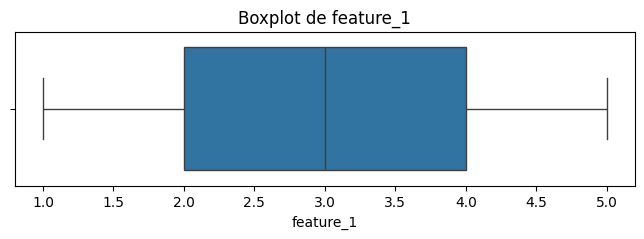

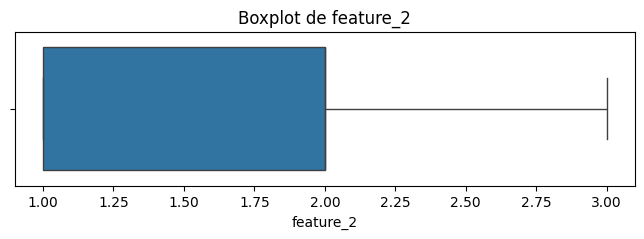

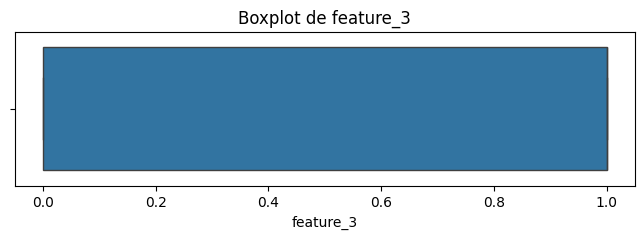

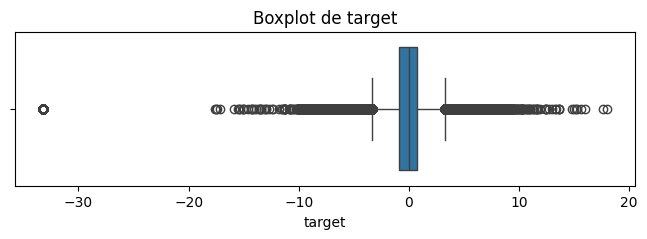

In [ ]:
# Análisis de duplicados y valores atípicos en todas las columnas de train.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_train.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna (valores que se repiten)
for col in vdf_train.columns:
    n_unicos = vdf_train[col].nunique()
    n_total = len(vdf_train[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Análisis de valores atípicos (outliers) para columnas numéricas
print("\nAnálisis de outliers:")
num_cols = vdf_train.select_dtypes(include=[np.number]).columns
outlier_summary = []

for col in num_cols:
    Q1 = vdf_train[col].quantile(0.25)
    Q3 = vdf_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_train[col] < lower) | (vdf_train[col] > upper)).sum()
    outlier_summary.append({
        'columna': col,
        'limite_inferior': lower,
        'limite_superior': upper,
        'n_outliers': n_outliers
    })
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# 4. Visualización de outliers para cada columna numérica
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_train[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Merchants

Número de filas completamente duplicadas: 0
Columna 'merchant_id': 63 valores repetidos (334633 únicos de 334696)
Columna 'merchant_group_id': 225305 valores repetidos (109391 únicos de 334696)
Columna 'merchant_category_id': 334372 valores repetidos (324 únicos de 334696)
Columna 'subsector_id': 334655 valores repetidos (41 únicos de 334696)
Columna 'numerical_1': 333742 valores repetidos (954 únicos de 334696)
Columna 'numerical_2': 333749 valores repetidos (947 únicos de 334696)
Columna 'category_1': 334694 valores repetidos (2 únicos de 334696)
Columna 'most_recent_sales_range': 334691 valores repetidos (5 únicos de 334696)
Columna 'most_recent_purchases_range': 334691 valores repetidos (5 únicos de 334696)
Columna 'avg_sales_lag3': 331324 valores repetidos (3372 únicos de 334696)
Columna 'avg_purchases_lag3': 234693 valores repetidos (100003 únicos de 334696)
Columna 'active_months_lag3': 334693 valores repetidos (3 únicos de 334696)
Columna 'avg_sales_lag6': 330189 valores repeti

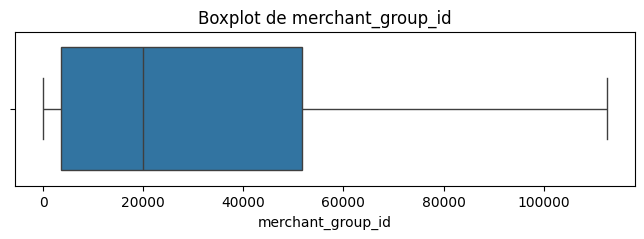

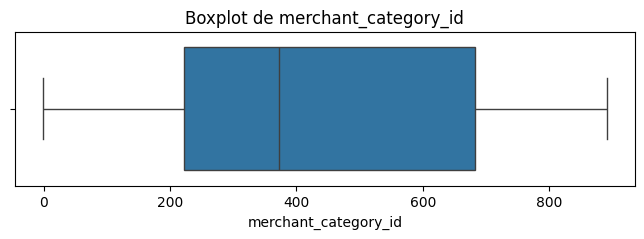

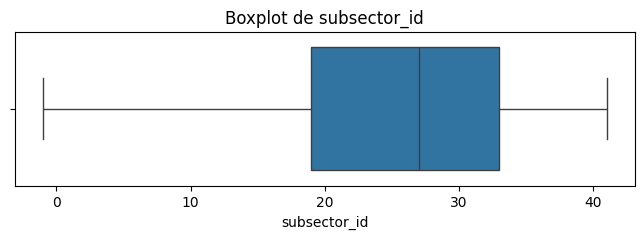

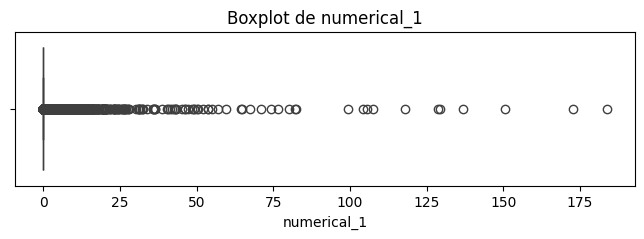

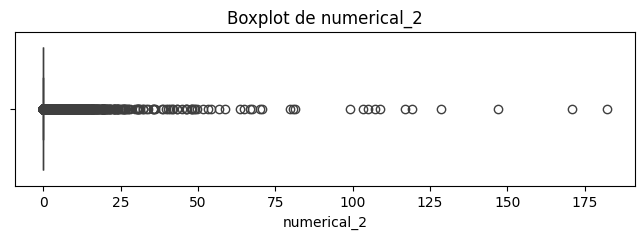

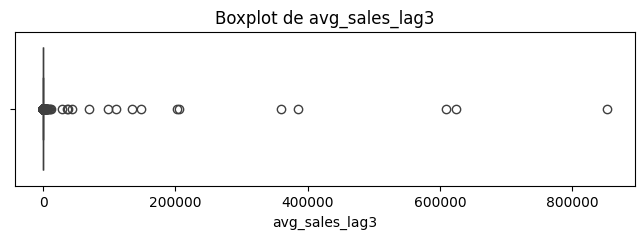

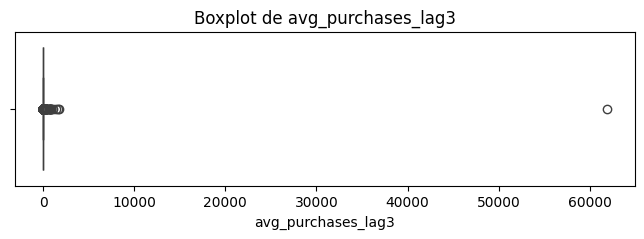

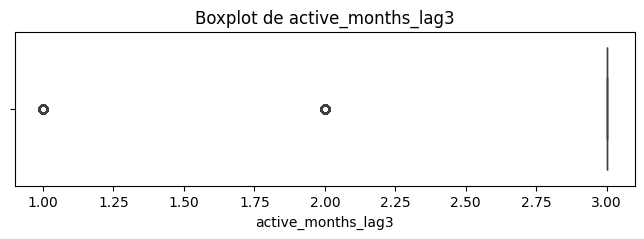

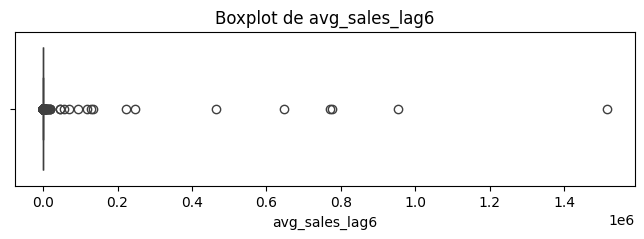

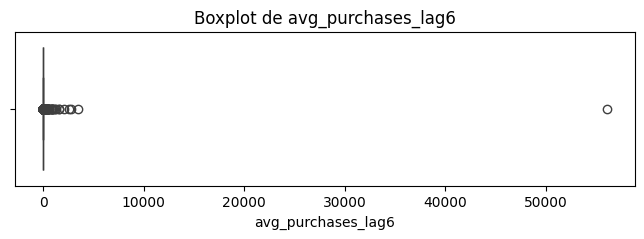

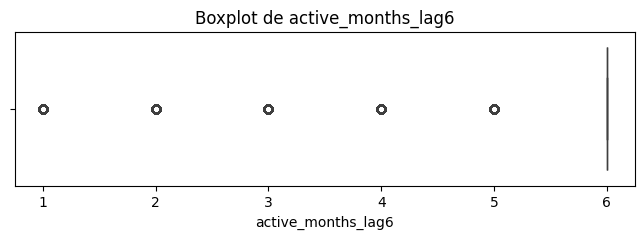

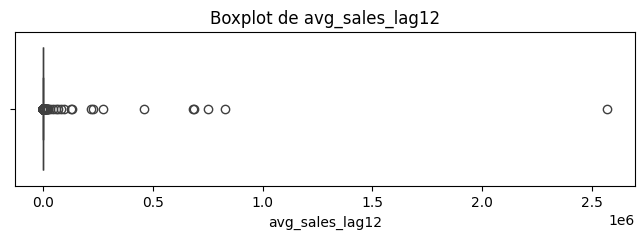

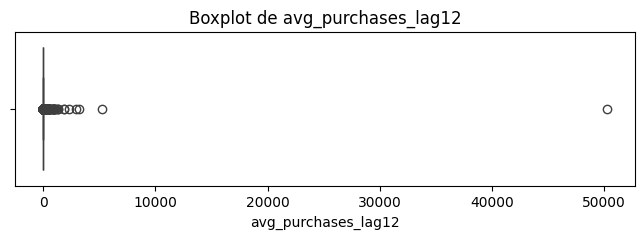

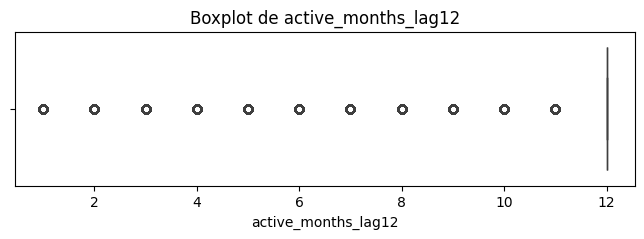

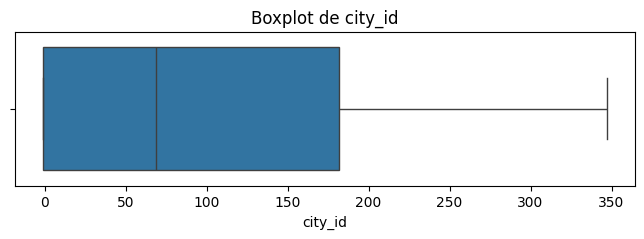

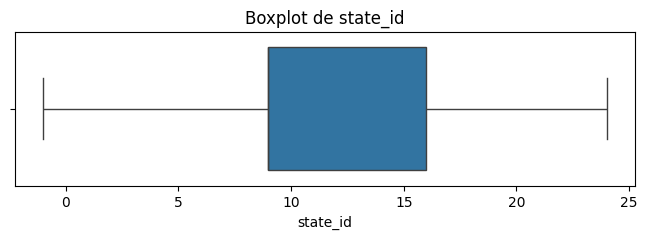

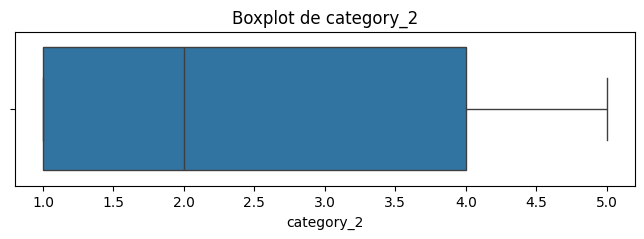

In [ ]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de merchants.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_merchants.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_merchants.columns:
    n_unicos = vdf_merchants[col].nunique()
    n_total = len(vdf_merchants[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")
num_cols = vdf_merchants.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_merchants[col].quantile(0.25)
    Q3 = vdf_merchants[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_merchants[col] < lower) | (vdf_merchants[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# 4. Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_merchants[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Nen Merchants Transactions

Número de filas completamente duplicadas: 0
Columna 'authorized_flag': 1963030 valores repetidos (1 únicos de 1963031)
Columna 'card_id': 1673030 valores repetidos (290001 únicos de 1963031)
Columna 'city_id': 1962723 valores repetidos (308 únicos de 1963031)
Columna 'category_1': 1963029 valores repetidos (2 únicos de 1963031)
Columna 'installments': 1963016 valores repetidos (15 únicos de 1963031)
Columna 'category_3': 1963028 valores repetidos (3 únicos de 1963031)
Columna 'merchant_category_id': 1962717 valores repetidos (314 únicos de 1963031)
Columna 'merchant_id': 1736902 valores repetidos (226129 únicos de 1963031)
Columna 'month_lag': 1963029 valores repetidos (2 únicos de 1963031)
Columna 'purchase_amount': 1887841 valores repetidos (75190 únicos de 1963031)
Columna 'purchase_date': 296006 valores repetidos (1667025 únicos de 1963031)
Columna 'category_2': 1963026 valores repetidos (5 únicos de 1963031)
Columna 'state_id': 1963006 valores repetidos (25 únicos de 1963031)
Colu

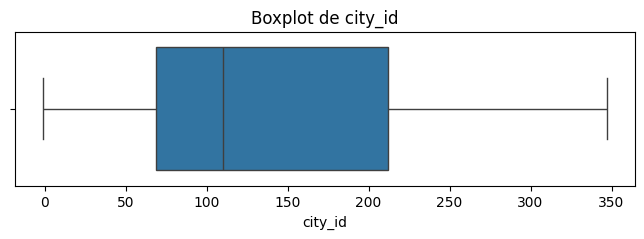

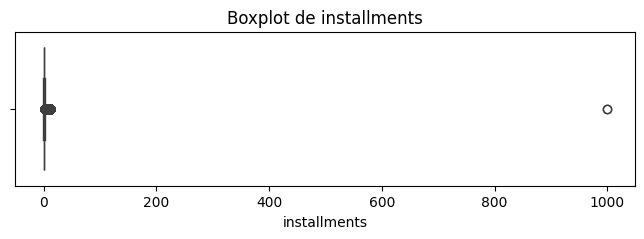

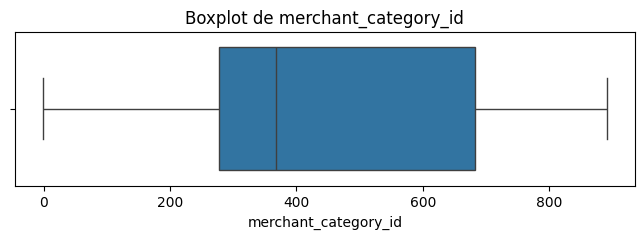

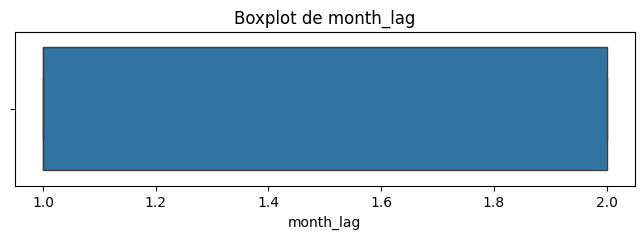

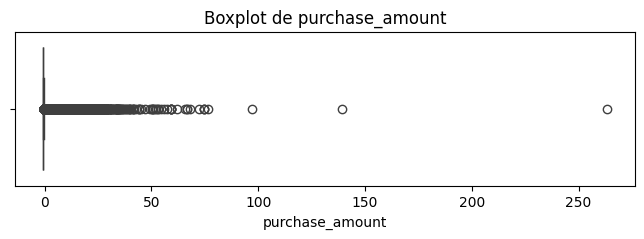

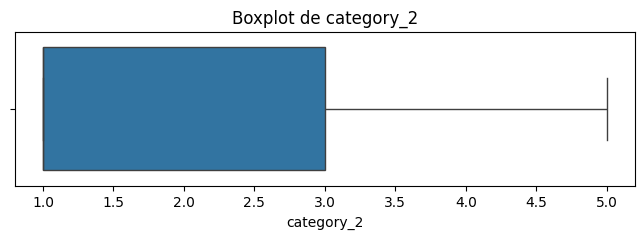

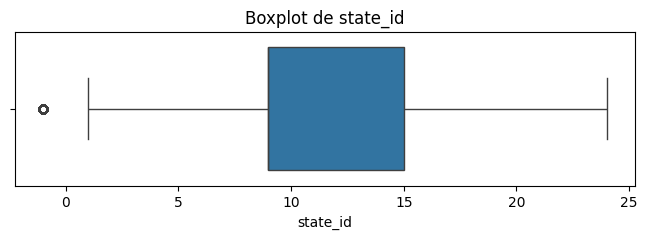

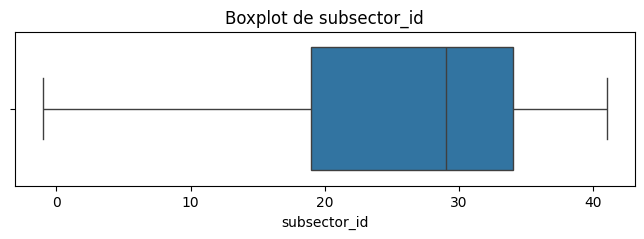

In [ ]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de new_merchant_transactions.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_new_trans.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_new_trans.columns:
    n_unicos = vdf_new_trans[col].nunique()
    n_total = len(vdf_new_trans[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")

num_cols = vdf_new_trans.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_new_trans[col].quantile(0.25)
    Q3 = vdf_new_trans[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_new_trans[col] < lower) | (vdf_new_trans[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_new_trans[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Análisis de duplicados y valores atípicos de Historical Transactions

In [ ]:
# Análisis de filas duplicadas y valores atípicos en todas las columnas de historical_transactions.csv

# 1. Duplicados de filas completas
duplicados_filas = vdf_hist_trans.duplicated().sum()
print(f"Número de filas completamente duplicadas: {duplicados_filas}")

# 2. Duplicados por columna
for col in vdf_hist_trans.columns:
    n_unicos = vdf_hist_trans[col].nunique()
    n_total = len(vdf_hist_trans[col])
    print(f"Columna '{col}': {n_total - n_unicos} valores repetidos ({n_unicos} únicos de {n_total})")

# 3. Outliers en columnas numéricas usando IQR
print("\nAnálisis de outliers:")

num_cols = vdf_hist_trans.select_dtypes(include=[np.number]).columns
for col in num_cols:
    Q1 = vdf_hist_trans[col].quantile(0.25)
    Q3 = vdf_hist_trans[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    n_outliers = ((vdf_hist_trans[col] < lower) | (vdf_hist_trans[col] > upper)).sum()
    print(f"Columna '{col}': {n_outliers} outliers (rango típico: {lower:.2f} a {upper:.2f})")

# Boxplot para visualizar
for col in num_cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=vdf_hist_trans[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

## Errores de codificación, columnas irrelevantes, formatos incorrectos.

## Train

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_train.select_dtypes(include=['object']).columns:
    muestras = vdf_train[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_train.columns:
    if vdf_train[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'first_active_month' in vdf_train.columns:
    try:
        pd.to_datetime(vdf_train['first_active_month'], format='%Y-%m')
        print("Columna 'first_active_month' tiene formato correcto.")
    except Exception as e:
        print("Formato incorrecto en 'first_active_month':", e)
else:
    print("No existe la columna 'first_active_month'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_train.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_train[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_train.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
Columna 'first_active_month' tiene formato correcto.


## Merchants

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_merchants.select_dtypes(include=['object']).columns:
    muestras = vdf_merchants[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_merchants.columns:
    if vdf_merchants[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'first_active_month' in vdf_merchants.columns:
    try:
        pd.to_datetime(vdf_merchants['first_active_month'], format='%Y-%m')
        print("Columna 'first_active_month' tiene formato correcto.")
    except Exception as e:
        print("Formato incorrecto en 'first_active_month':", e)
else:
    print("No existe la columna 'first_active_month'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_merchants.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_merchants[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_merchants.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
No existe la columna 'first_active_month'.


## New Merchant Transactions

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_new_trans.select_dtypes(include=['object']).columns:
    muestras = vdf_new_trans[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_new_trans.columns:
    if vdf_new_trans[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'purchase_date' in vdf_new_trans.columns:
    try:
        pd.to_datetime(vdf_new_trans['purchase_date'])
        print("Columna 'purchase_date' tiene formato de fecha correcto.")
    except Exception as e:
        print("Formato incorrecto en 'purchase_date':", e)
else:
    print("No existe la columna 'purchase_date'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_new_trans.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_new_trans[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_new_trans.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

Columnas irrelevantes (sin variabilidad): ['authorized_flag']
Columna 'purchase_date' tiene formato de fecha correcto.


## Historical Transactions

In [ ]:
# 1. Detección de errores de codificación (caracteres extraños)
for col in vdf_hist_trans.select_dtypes(include=['object']).columns:
    muestras = vdf_hist_trans[col].dropna().astype(str).sample(10, random_state=1)
    for val in muestras:
        try:
            val.encode('utf-8').decode('utf-8')
        except UnicodeDecodeError:
            print(f"Error de codificación en columna '{col}': {val}")

# 2. Columnas irrelevantes (por ejemplo, columnas con un solo valor o sin variabilidad)
columnas_irrelevantes = []
for col in vdf_hist_trans.columns:
    if vdf_hist_trans[col].nunique() <= 1:
        columnas_irrelevantes.append(col)
if columnas_irrelevantes:
    print("Columnas irrelevantes (sin variabilidad):", columnas_irrelevantes)
else:
    print("No se detectaron columnas irrelevantes por baja variabilidad.")

# 3. Formatos incorrectos (ejemplo: fechas mal formateadas)
if 'purchase_date' in vdf_hist_trans.columns:
    try:
        pd.to_datetime(vdf_hist_trans['purchase_date'])
        print("Columna 'purchase_date' tiene formato de fecha correcto.")
    except Exception as e:
        print("Formato incorrecto en 'purchase_date':", e)
else:
    print("No existe la columna 'purchase_date'.")

# 4. Detección de columnas numéricas con valores no numéricos
for col in vdf_hist_trans.select_dtypes(include=['object']).columns:
    try:
        pd.to_numeric(vdf_hist_trans[col])
    except Exception:
        continue  # Si falla, es porque la columna no es numérica, lo cual puede ser esperado

# 5. Detección de columnas con nombres sospechosos (espacios, caracteres raros)
for col in vdf_hist_trans.columns:
    if ' ' in col or not col.isidentifier():
        print(f"Nombre de columna sospechoso: '{col}'")

No se detectaron columnas irrelevantes por baja variabilidad.
Columna 'purchase_date' tiene formato de fecha correcto.


In [ ]:
# Posibles inconsistencias entre archivos (ej.: merchant_ids que no existen).

In [ ]:
import pandas as pd

# Cargar los datasets necesarios
df_hist = pd.read_csv('src/historical_transactions.csv')
df_new = pd.read_csv('src/new_merchant_transactions.csv')
df_merchants = pd.read_csv('src/merchants.csv')

# Validar merchant_id de historical_transactions
merchant_ids_hist = set(df_hist['merchant_id'].unique())
merchant_ids_merchants = set(df_merchants['merchant_id'].unique())
merchant_ids_hist_no_encontrados = merchant_ids_hist - merchant_ids_merchants

print(f"merchant_id de historical_transactions.csv NO encontrados en merchants.csv: {len(merchant_ids_hist_no_encontrados)}")
if merchant_ids_hist_no_encontrados:
    print(list(merchant_ids_hist_no_encontrados))  # Muestra los primeros 10

# Validar merchant_id de new_merchant_transactions
merchant_ids_new = set(df_new['merchant_id'].unique())
merchant_ids_new_no_encontrados = merchant_ids_new - merchant_ids_merchants

print(f"merchant_id de new_merchant_transactions.csv NO encontrados en merchants.csv: {len(merchant_ids_new_no_encontrados)}")
if merchant_ids_new_no_encontrados:
    print(list(merchant_ids_new_no_encontrados))  # Muestra los primeros 10

merchant_id de historical_transactions.csv NO encontrados en merchants.csv: 1
{nan}
[nan]
merchant_id de new_merchant_transactions.csv NO encontrados en merchants.csv: 1
[nan]


# 8.Análisis de Relaciones entre Tablas

In [ ]:
# ¿Cómo se relacionan las tablas? (train/test con transacciones y merchants).

| Tabla                       | Relaciona con...                | Clave de unión | Tipo de relación  |
| --------------------------- | ------------------------------- | -------------- | ----------------- |
| `train.csv` / `test.csv`    | `historical_transactions.csv`   | `card_id`      | 1 a muchos (1\:N) |
| `train.csv` / `test.csv`    | `new_merchant_transactions.csv` | `card_id`      | 1 a muchos (1\:N) |
| `historical_transactions`   | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |
| `new_merchant_transactions` | `merchants.csv`                 | `merchant_id`  | muchos a 1 (N:1)  |


1. train.csv / test.csv
Clave primaria: card_id

Relaciona con: transacciones históricas y nuevas

2. historical_transactions y new_merchant_transactions
Clave foránea: card_id → viene de train/test

Clave foránea: merchant_id → apunta a merchants

3. merchants.csv
Clave primaria: merchant_id

No tiene referencias a card_id directamente, es solo receptor

In [ ]:
# Análisis de cardinalidad y potenciales problemas de duplicación.

| Relación                   | Cardinalidad                | Posibles problemas                                            |
| -------------------------- | --------------------------- | ------------------------------------------------------------- |
| `train` ↔ `historical`     | 1 a muchos                  | Duplicación de `train` al hacer `merge` directo               |
| `train` ↔ `merchants`      | Indirecta vía transacciones | Cuidado si se hace doble join con merchants desde dos fuentes |
| `historical` ↔ `merchants` | muchos a 1                  | Seguro: no hay duplicación                                    |



1. Relación entre train/test y historical_transactions

La relación entre estas tablas es de uno a muchos (1:N), unidas a través del campo card_id. Esto significa que cada entrada en train o test puede estar asociada con decenas o incluso cientos de transacciones históricas.

Un merge directo utilizando card_id como clave puede inflar el número de filas del dataset, ya que replicará la información de train tantas veces como transacciones tenga cada tarjeta. Por ejemplo, si un card_id presenta 200 transacciones, la fila correspondiente de train se repetirá 200 veces.

Recomendación: Antes de realizar la unión, es necesario aplicar funciones de agregación sobre las transacciones agrupadas por card_id (por ejemplo: sumatorias, promedios, conteos, últimas fechas, entre otras), y luego realizar el merge.

2. Relación entre train/test y new_merchant_transactions

Esta relación también es de uno a muchos (1:N) por card_id, de manera análoga al caso anterior. Aunque el volumen de datos en new_merchant_transactions suele ser menor que en historical_transactions, la problemática es similar.

Recomendación: Se recomienda aplicar agregaciones por card_id antes de realizar la unión con train o test, para evitar la duplicación masiva de datos.

3. Relación entre historical_transactions y merchants

Esta relación es de muchos a uno (N:1), a través de la clave merchant_id. Es decir, múltiples transacciones pueden estar asociadas a un único comercio.

La unión no genera duplicación de registros, ya que cada transacción apunta a un único comercio. Sin embargo, es importante tener en cuenta que algunos valores de merchant_id pueden ser nulos o inválidos, por lo que un inner join podría provocar la pérdida de información.

Recomendación: Se recomienda utilizar un left join desde historical_transactions hacia merchants para preservar todos los registros de transacciones, aún si no tienen comercio asociado.

4. Relación entre new_merchant_transactions y merchants

Este caso es análogo al anterior: una relación de muchos a uno (N:1) por merchant_id, con el mismo volumen de datos aproximado.

Recomendación: Al igual que con historical_transactions, se sugiere aplicar un left join desde new_merchant_transactions hacia merchants para mantener la integridad de las transacciones.

5. Consideraciones sobre uniones múltiples con merchants

Si se realiza la unión de la tabla merchants tanto con historical_transactions como con new_merchant_transactions, existe el riesgo de redundancia de columnas como merchant_category_id, subsector_id, entre otras, que podrían aparecer duplicadas y generar ambigüedad.

Recomendación: En estos casos, se debe renombrar las columnas provenientes de merchants con prefijos diferenciados (por ejemplo: hist_merchant_* y new_merchant_*) para evitar conflictos en el dataset final y asegurar la trazabilidad de los datos.



# 9.HIPOTESIS PRELIMINARES



**H01: La antigüedad de la tarjeta está positivamente relacionada con el score de lealtad.**

**H02: El gasto total y la frecuencia de compras en nuevos comercios pueden influir en el score de lealtad.**

**H03: El comportamiento histórico de compra (monto, frecuencia, cuotas) es un predictor relevante del score de lealtad.**

**H04: Las variables categóricas internas (feature_1, feature_2, feature_3) tienen baja correlación lineal con el score.**

**H05: La calidad de los datos (valores nulos, duplicados, inconsistencias en claves) puede afectar la capacidad predictiva del modelo si no se trata adecuadamente.**

# 10.Conclusiones y Próximos Pasos
### Conclusiones de la Fase de Comprensión de los Datos
Durante la fase de comprensión de los datos se analizó la estructura, calidad y valor informativo de los conjuntos de datos proporcionados por Elo. A partir del análisis exploratorio, se destaca lo siguiente:

- Los datos de clientes, transacciones históricas y recientes, junto con la información de los comercios, proporcionan una visión integral del comportamiento de compra.

- La variable objetivo (target) muestra una distribución asimétrica y presencia de outliers, lo cual deberá ser tratado cuidadosamente en el modelado.

- Existen variables con valores nulos y categorías poco frecuentes que requieren limpieza y tratamiento especial.

- Algunas variables individuales tienen baja correlación lineal con el score de lealtad, por lo que la creación de características agregadas y combinadas será clave para mejorar la capacidad predictiva del modelo.

Con base en el análisis realizado, se identifican las siguientes variables como candidatas clave para el modelado predictivo del score de lealtad:

Del archivo train.csv:

- card_id: Identificador único del cliente (clave principal para unión).

- first_active_month: Potencial para calcular la antigüedad del cliente.

- feature_1, feature_2, feature_3: Variables categóricas internas de Elo que parecen tener relación con comportamiento de compra.

Del archivo historical_transactions.csv:

- purchase_amount: Relevante para caracterizar el gasto histórico del cliente.

- installments: Puede indicar el tipo de compra (contado vs crédito).

- purchase_date: Útil para calcular frecuencia, antigüedad y estacionalidad.

- month_lag: Permite análisis temporal de comportamiento.

- authorized_flag: Indica si la transacción fue efectiva.

- category_1, category_2, category_3: Atributos categóricos de la compra.

- merchant_id, merchant_category_id: Potencial para análisis por tipo de comercio.

Del archivo new_merchant_transactions.csv:

- Variables similares a historical_transactions, pero enfocadas en el comportamiento reciente del cliente con nuevos comercios.

Del archivo merchants.csv:

- merchant_group_id, avg_sales_lag*, avg_purchases_lag*: Indicadores de comportamiento agregado del comercio.

- category_1, most_recent_sales_range, most_recent_purchases_range: Información contextual del comercio.

Estas variables deben ser transformadas o agregadas por cliente (card_id) para que puedan ser utilizadas en un modelo supervisado.

En base a los hallazgos y el tipo de problema (regresión supervisada), se recomiendan los siguientes pasos para la fase de Preparación de los Datos:

1. Limpieza y tratamiento de valores nulos

    - Imputar valores faltantes en category_2, category_3, installments, y variables derivadas de merchants.csv.

    - Eliminar o agrupar categorías con baja frecuencia.

2. Conversión de variables temporales

    - Calcular antigüedad del cliente desde first_active_month.

    - Extraer atributos temporales (mes, día, estacionalidad) de las fechas de transacciones.

3. Agregaciones por cliente

    - Agrupar transacciones históricas y nuevas por card_id y calcular:

      - Total y promedio gastado.

      - Número de transacciones.

      - Frecuencia de compras.

      - Porcentaje de transacciones autorizadas.

      - Comportamiento por categoría.

4. Codificación de variables categóricas

    - Aplicar codificación (por ejemplo, label encoding o one-hot encoding) a variables como feature_1-3, category_1-3, state_id, city_id, etc.

5. Fusión de datos

    - Integrar las tablas historical_transactions, new_merchant_transactions y merchants al dataset base (train.csv) mediante card_id y merchant_id.

6. Tratamiento de outliers

    - Identificar y tratar valores extremos en variables como purchase_amount y en el target (target) si se considera.

7. Preparación final para modelado

    - Selección de variables finales.

    - División en conjuntos de entrenamiento, validación y prueba.

    - Generación de modelos base (baseline) como regresión lineal simple o predicción por media para establecer punto de comparación.